In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
hp = pd.DataFrame(pd.read_excel('innercity.xlsx'))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
hp.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [6]:
hp.tail()

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
21608          3130.0      60467.0    2     0    0.0         3      9.0   
21609          1030.0       4841.0    1     0    0.0         3      7.0   
21610          3710.0      34412.0    2     0    0.0         3     10.0   
21611          1560.0       7800.0    2     0    0.0         3      7.0   
21612          1940.0       4875.0    2     0    0.0         4      9.0   

       ceil_measure  basement yr_built  yr_renovated  zipcode      lat  \
21608        3130.0       0.0     1996             0    98014  47.6618   
21609         920.0     110.0     1939             0    98103  47.6860   
21610        2910.0     800.0     1978             0    98075  47.5888   
21611        1560.0       0.0     1997             0    98168  47.5140   
21612        1940.0       0.0     1925             0    98112  47.6427   

          long  living_measure15  lot_measure15  furnished total_area  
21608 -121.962            2780.0        44224.0        1.0      63597  
21609 -122.341            1530.0         4944.0        0.0       5871  
21610  -122.04            2390.0        34412.0        1.0      38122  
21611 -122.316            1160.0         7800.0        0.0       9360  
21612 -122.304            1790.0         4875.0        1.0       6815

In [7]:
print("no. of rows: ",hp.shape[0], "\n""no. of columns: ",hp.shape[1])

no. of rows:  21613 
no. of columns:  23


In [8]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [9]:
pd.options.display.float_format = '{:.2f}'.format
hp.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21505.00          3.37          0.93       0.00   
room_bath        21505.00          2.12          0.77       0.00   
living_measure   21596.00       2079.86        918.50     290.00   
lot_measure      21571.00      15104.58      41423.62     520.00   
sight            21556.00          0.23          0.77       0.00   
quality          21612.00          7.66          1.18       1.00   
ceil_measure     21612.00       1788.37        828.10     290.00   
basement         21612.00        291.52        442.58       0.00   
yr_renovated     21613.00         84.40        401.68       0.00   
zipcode          21613.00      98077.94         53.51   98001.00   
lat              21613.00         47.56          0.14      47.16   
living_measure15 21447.00       1987.07        685.52     399.00   
lot_measure15    21584.00      12766.54      27286.99     651.00   
furnished        21584.00          0.20          0.40       0.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1429.25       1910.00       2550.00      13540.00  
lot_measure            5040.00       7618.00      10684.50    1651359.00  
sight                     0.00          0.00          0.00          4.00  
quality                   7.00          7.00          8.00         13.00  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_renovated              0.00          0.00          0.00       2015.00  
zipcode               98033.00      98065.00      98118.00      98199.00  
lat                      47.47         47.57         47.68         47.78  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10087.00     871200.00  
furnished                 0.00          0.00          0.00          1.00

In [10]:
hp['cid'].duplicated().sum()

177

In [11]:
hp.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [12]:
hp.isnull().sum().sum()

689

In [13]:
hp['ceil'].unique()

array([1, 2, 3, 1.5, 2.5, '$', nan, 3.5], dtype=object)

In [14]:
hp['coast'].unique()

array([0, 1, '$', nan], dtype=object)

In [15]:
hp['condition'].unique()

array([3, 4, 5, 2, nan, 1, '$'], dtype=object)

In [16]:
hp['yr_built'].unique()

array([1966, 1948, 2009, 1924, 1994, 2005, 1978, 1983, 2012, 1912, 1990,
       1967, 1919, 1908, 1950, 2000, 2013, 1943, 1922, 1977, 2004, 1935,
       1964, 1945, 1987, 2008, 1940, 2003, 1988, 1985, 1998, 1995, 1946,
       1984, 1958, 1963, 1942, 2014, 1971, 1936, 1954, 1923, 2002, 1972,
       2007, 1930, 1962, 1999, 1953, 1965, 2010, 1997, 2006, 1979, 1996,
       1992, 1968, 1980, 1981, 1969, 2001, 1929, 1952, 1916, 1976, 1974,
       1920, 1931, 1975, 1960, 1900, '$', 1986, 1989, 1906, 1955, 1956,
       1915, 1941, 1993, 2011, 1925, 1947, 1991, 1926, 1927, 1951, 1961,
       1932, 1917, 1928, 1959, 1921, 1911, 1949, 1982, 1913, 1957, 1914,
       1938, 1973, 1937, 1944, 1970, 1901, 1907, 1939, 1918, 1934, 1904,
       2015, 1909, 1910, 1905, 1902, 1933, 1903, nan], dtype=object)

In [17]:
hp['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [18]:
hp['ceil']=hp['ceil'].replace('$',np.NaN)
hp['coast']=hp['coast'].replace('$', np.NaN)
hp['condition']=hp['condition'].replace('$', np.NaN)
hp['yr_built']=hp['yr_built'].replace('$', np.NaN)
hp['long']=hp['long'].replace('$', np.NaN)
hp['total_area']=hp['total_area'].replace('$', np.NaN)

In [19]:
hp['ceil']=hp['ceil'].astype('float64')
hp['coast']=hp['coast'].astype('float64')
hp['condition']=hp['condition'].astype('float64')
hp['yr_built']=hp['yr_built'].astype('float64')
hp['long']=hp['long'].astype('float64')
hp['total_area']=hp['total_area'].astype('float64')

In [20]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [21]:
hp.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [22]:
hp['ceil']=hp['ceil'].fillna(hp['ceil'].median())
hp['coast']=hp['coast'].fillna(hp['coast'].mode()[0])
hp['condition']=hp['condition'].fillna(hp['condition'].median())
hp['yr_built']=hp['yr_built'].fillna(hp['yr_built'].median())
hp['long']=hp['long'].fillna(hp['long'].median())

In [23]:
hp.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                  0
coast                 0
sight                57
condition             0
quality               1
ceil_measure          1
basement              1
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [24]:
hp['room_bed']=hp['room_bed'].fillna(hp['room_bed'].median())
hp['room_bath']=hp['room_bath'].fillna(hp['room_bath'].median())
hp['living_measure']=hp['living_measure'].fillna(hp['living_measure'].median())
hp['lot_measure']=hp['lot_measure'].fillna(hp['lot_measure'].median())
hp['sight']=hp['sight'].fillna(hp['sight'].median())
hp['quality']=hp['quality'].fillna(hp['quality'].median())
hp['ceil_measure']=hp['ceil_measure'].fillna(hp['ceil_measure'].median())
hp['basement']=hp['basement'].fillna(hp['basement'].median())

In [25]:
hp.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed              0
room_bath             0
living_measure        0
lot_measure           0
ceil                  0
coast                 0
sight                 0
condition             0
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [26]:
hp['living_measure15']=hp['living_measure15'].fillna(hp['living_measure15'].median())
hp['lot_measure15']=hp['lot_measure15'].fillna(hp['lot_measure15'].median())
hp['furnished']=hp['furnished'].fillna(hp['furnished'].mode()[0])
hp['total_area']=hp['total_area'].fillna(hp['living_measure']+hp['lot_measure'])

In [27]:
hp.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [28]:
hp.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21613.00          3.37          0.93       0.00   
room_bath        21613.00          2.12          0.77       0.00   
living_measure   21613.00       2079.73        918.15     290.00   
lot_measure      21613.00      15090.03      41384.66     520.00   
ceil             21613.00          1.49          0.54       1.00   
coast            21613.00          0.01          0.09       0.00   
sight            21613.00          0.23          0.77       0.00   
condition        21613.00          3.41          0.65       1.00   
quality          21613.00          7.66          1.18       1.00   
ceil_measure     21613.00       1788.36        828.08     290.00   
basement         21613.00        291.51        442.58       0.00   
yr_built         21613.00       1971.01         29.36    1900.00   
yr_renovated     21613.00         84.40        401.68       0.00   
zipcode          21613.00      98077.94         53.51   98001.00   
lat              21613.00         47.56          0.14      47.16   
long             21613.00       -122.21          0.14    -122.52   
living_measure15 21613.00       1985.94        683.00     399.00   
lot_measure15    21613.00      12759.64      27269.32     651.00   
furnished        21613.00          0.20          0.40       0.00   
total_area       21613.00      17186.87      41589.08    1423.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1430.00       1910.00       2550.00      13540.00  
lot_measure            5043.00       7618.00      10660.00    1651359.00  
ceil                      1.00          1.50          2.00          3.50  
coast                     0.00          0.00          0.00          1.00  
sight                     0.00          0.00          0.00          4.00  
condition                 3.00          3.00          4.00          5.00  
quality                   7.00          7.00          8.00         13.00  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_built               1951.00       1975.00       1997.00       2015.00  
yr_renovated              0.00          0.00          0.00       2015.00  
zipcode               98033.00      98065.00      98118.00      98199.00  
lat                      47.47         47.57         47.68         47.78  
long                   -122.33       -122.23       -122.12       -121.31  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10080.00     871200.00  
furnished                 0.00          0.00          0.00          1.00  
total_area             7035.00       9575.00      13000.00    1652659.00

<AxesSubplot:xlabel='total_area', ylabel='Count'>

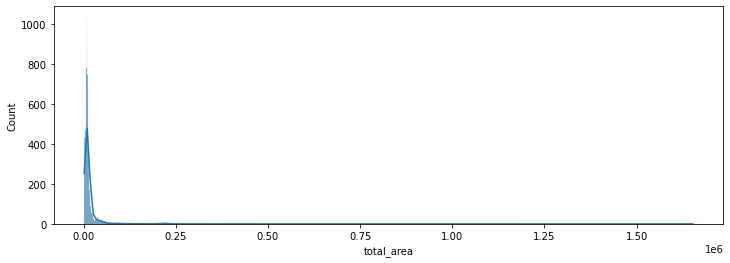

In [28]:
plt.figure(figsize=(12,4))
sns.histplot(hp['total_area'], kde=True)

CID


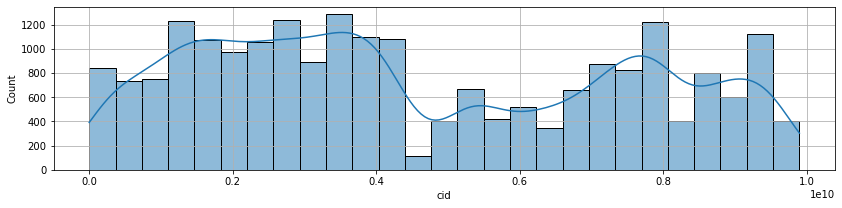

PRICE


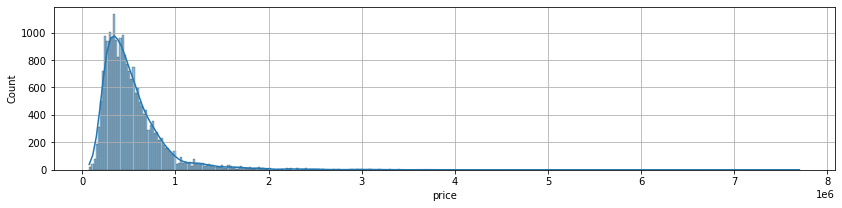

ROOM_BED


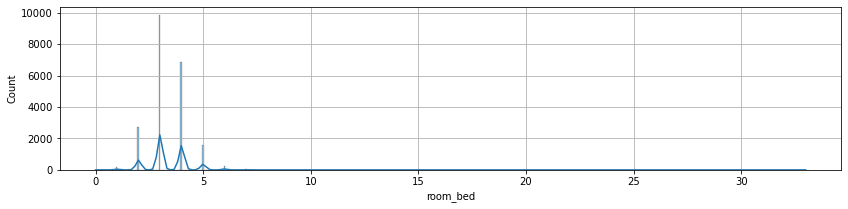

ROOM_BATH


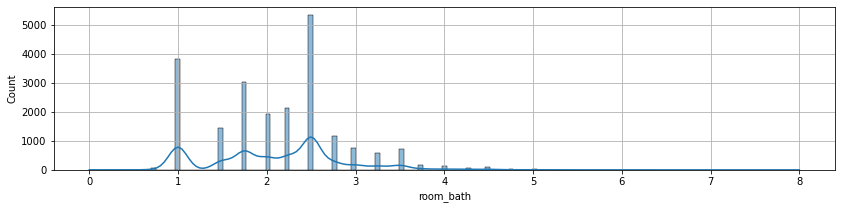

LIVING_MEASURE


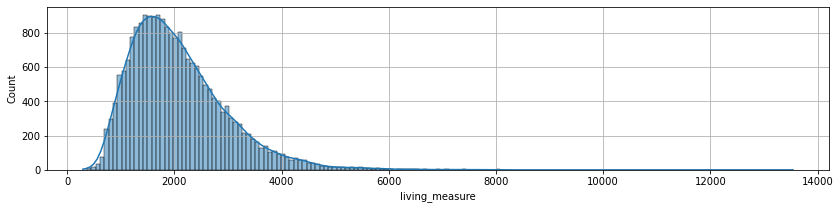

LOT_MEASURE


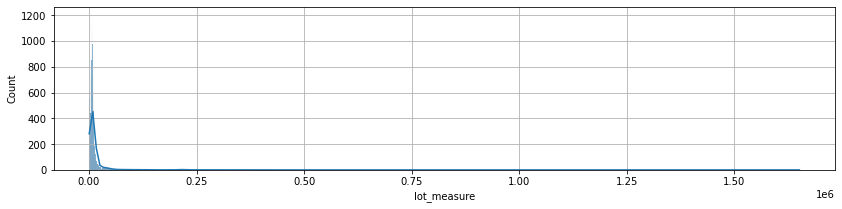

CEIL


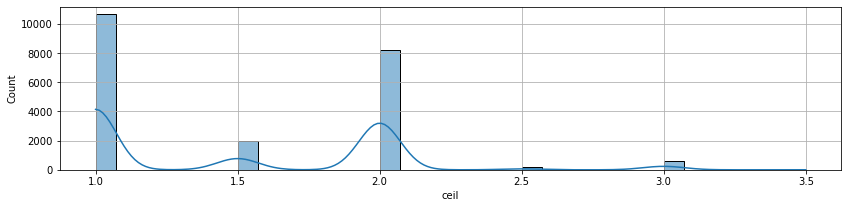

COAST


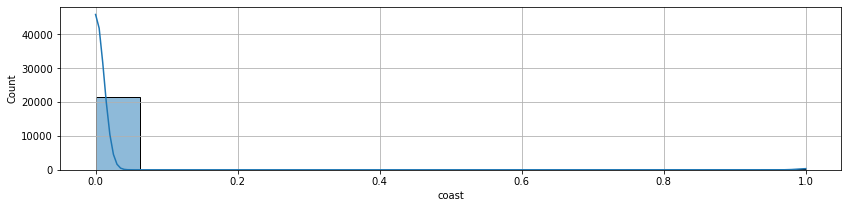

SIGHT


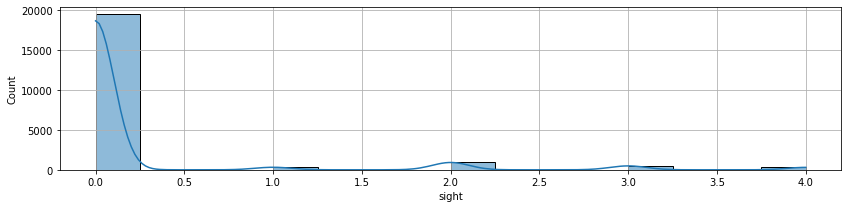

CONDITION


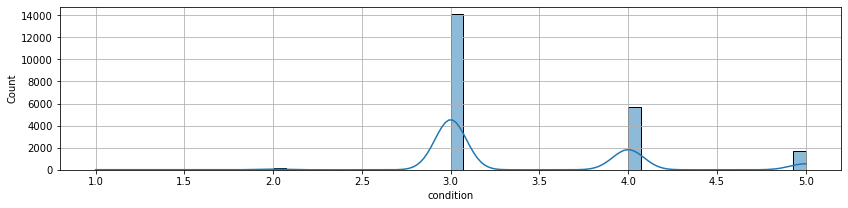

QUALITY


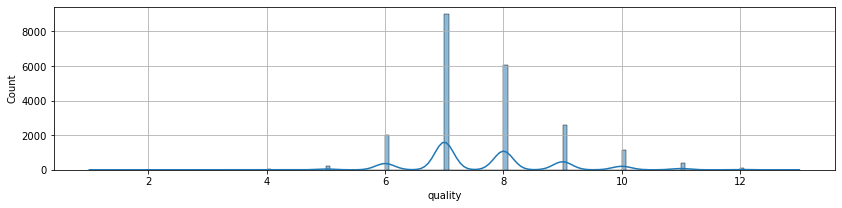

CEIL_MEASURE


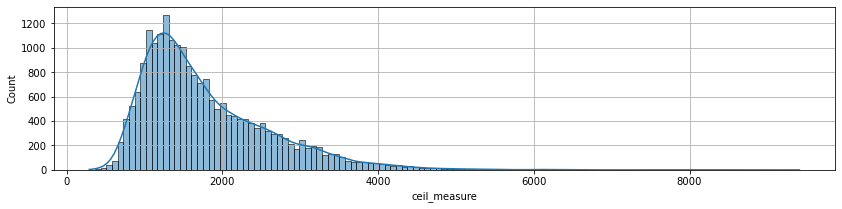

BASEMENT


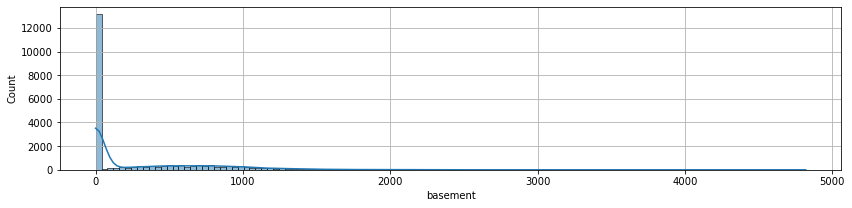

YR_BUILT


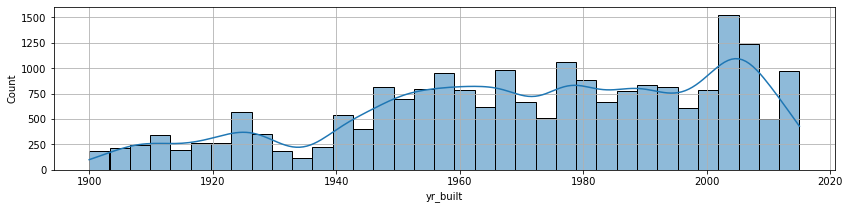

YR_RENOVATED


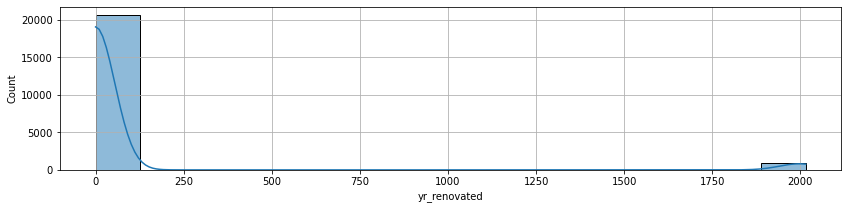

ZIPCODE


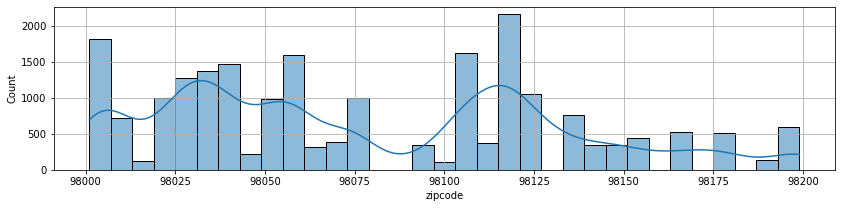

LAT


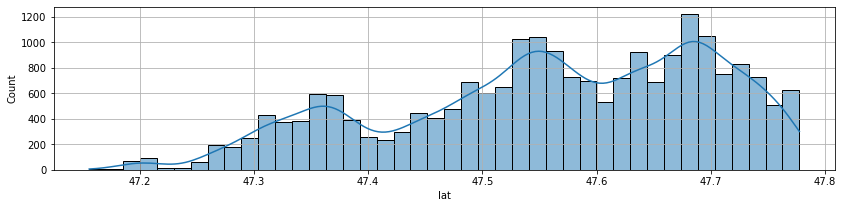

LONG


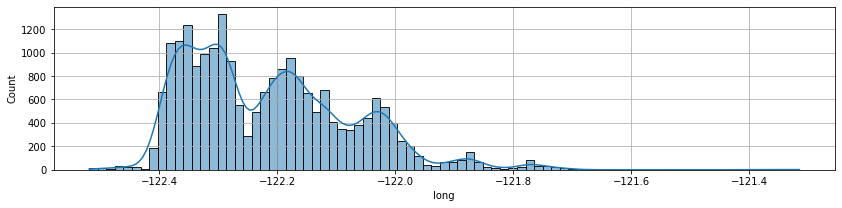

LIVING_MEASURE15


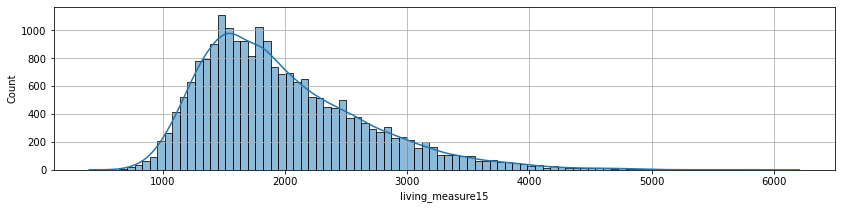

LOT_MEASURE15


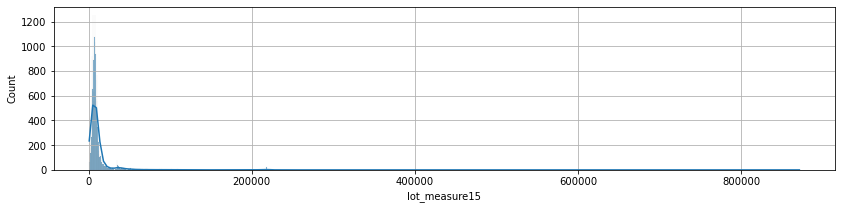

FURNISHED


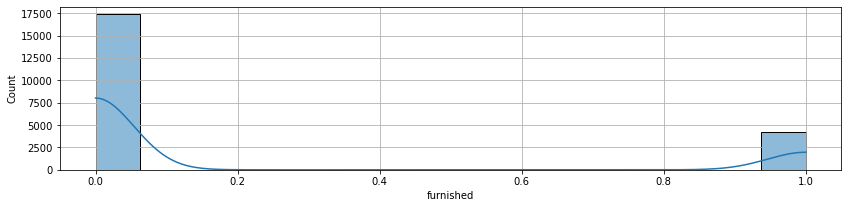

TOTAL_AREA


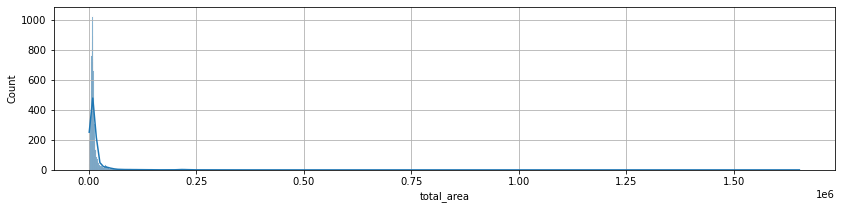

In [30]:
for column in hp.columns:
    if hp[column].dtype != 'object':
        print(column.upper())
        plt.figure(figsize=(14,3))
        sns.histplot(hp[column], kde=True)
        plt.grid()
        plt.show()

CID


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


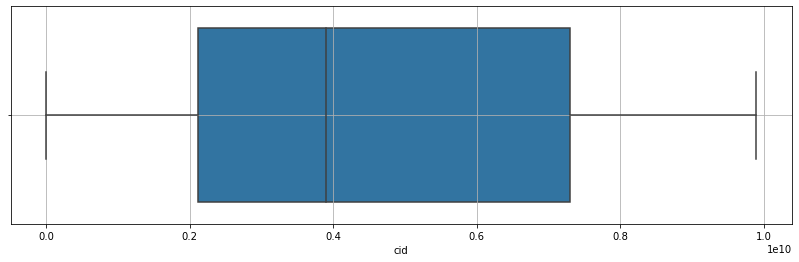

PRICE


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


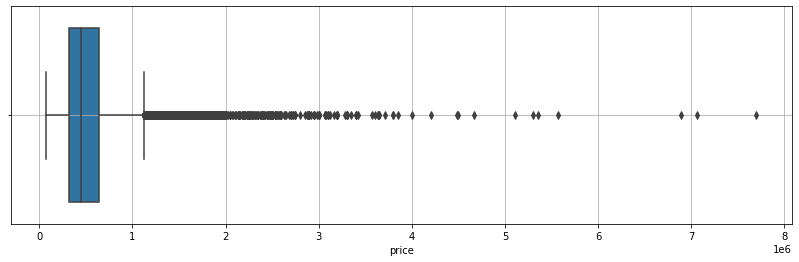

ROOM_BED


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


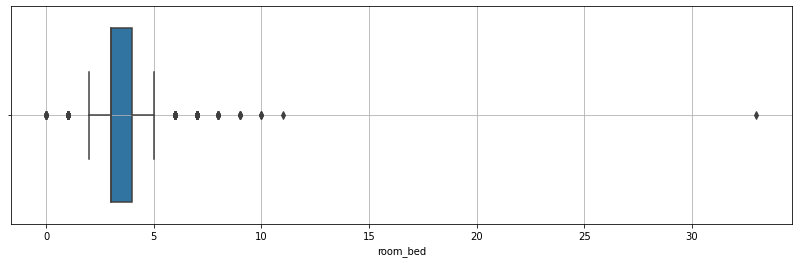

ROOM_BATH


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


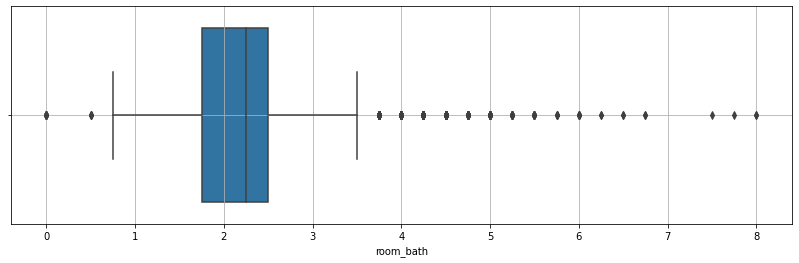

LIVING_MEASURE


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


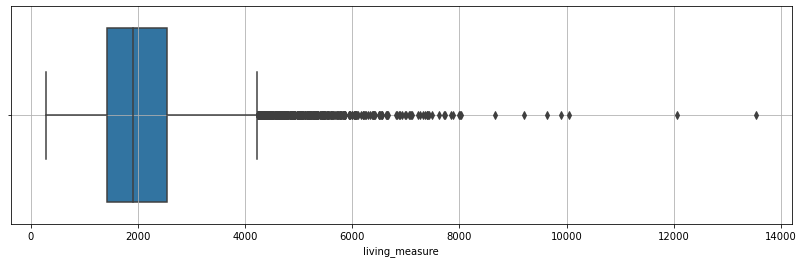

LOT_MEASURE


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


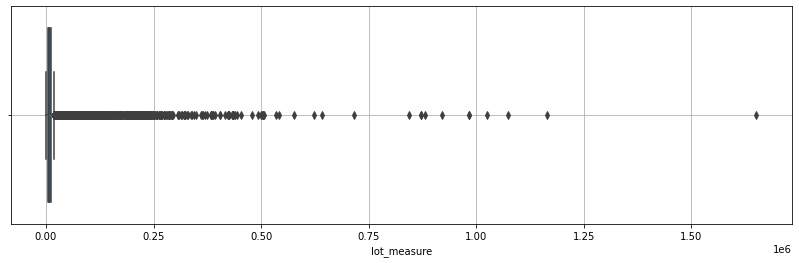

CEIL


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


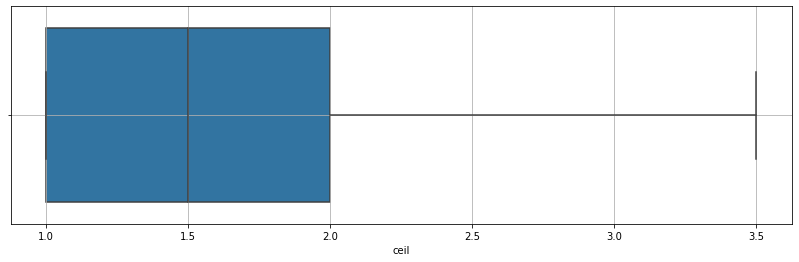

COAST


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


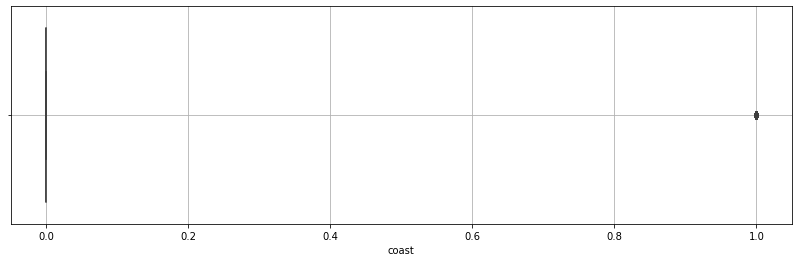

SIGHT


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


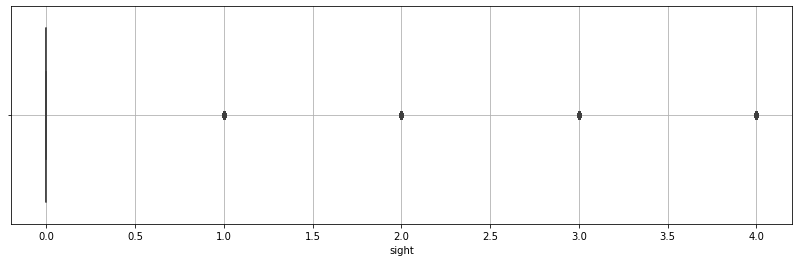

CONDITION


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


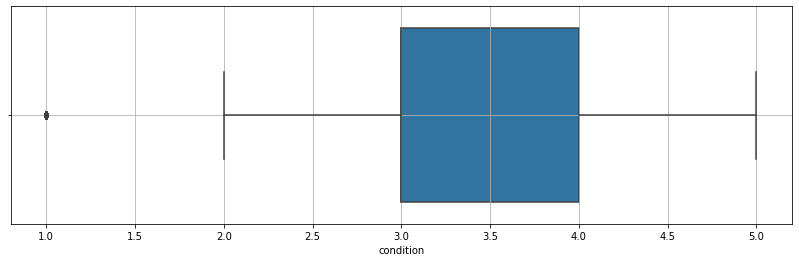

QUALITY


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


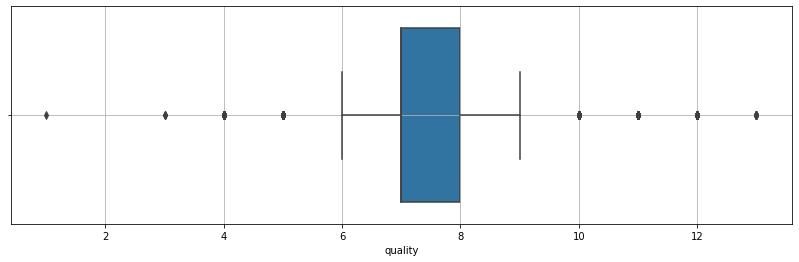

CEIL_MEASURE


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


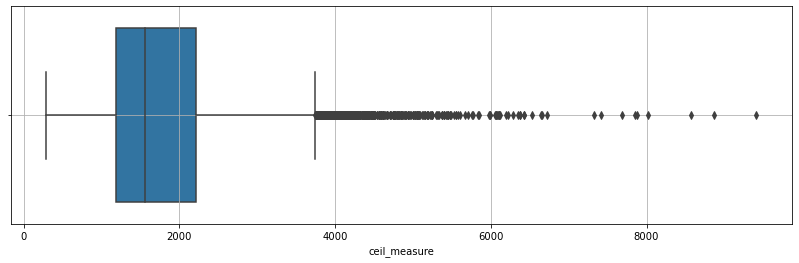

BASEMENT


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


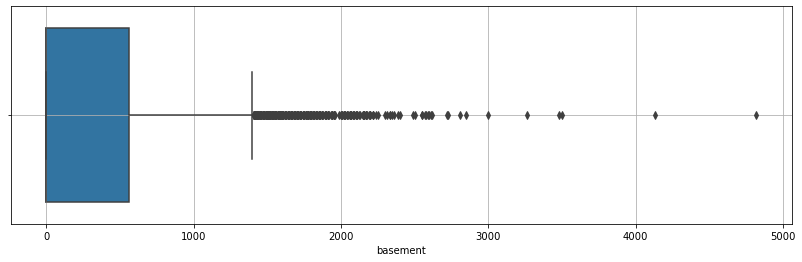

YR_BUILT


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


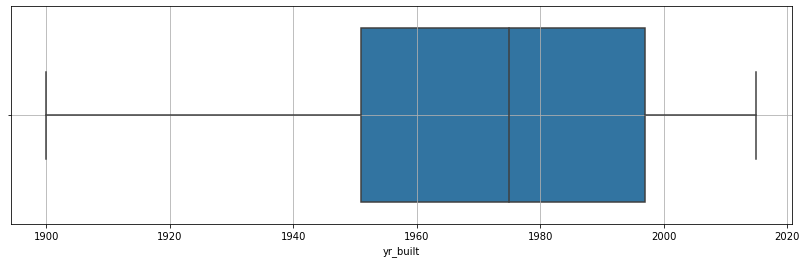

YR_RENOVATED


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


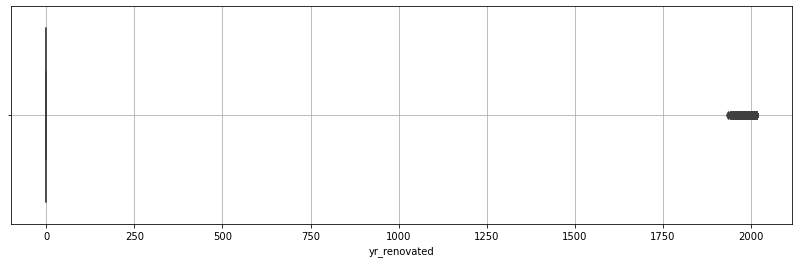

ZIPCODE


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


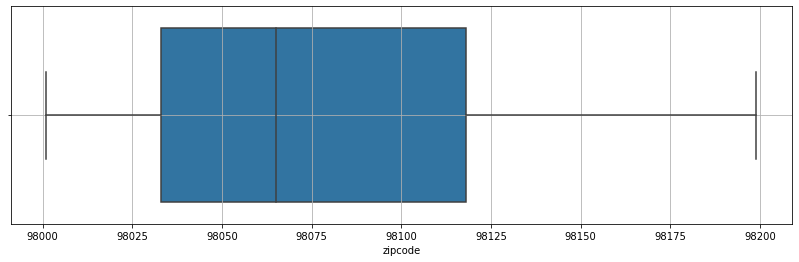

LAT


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


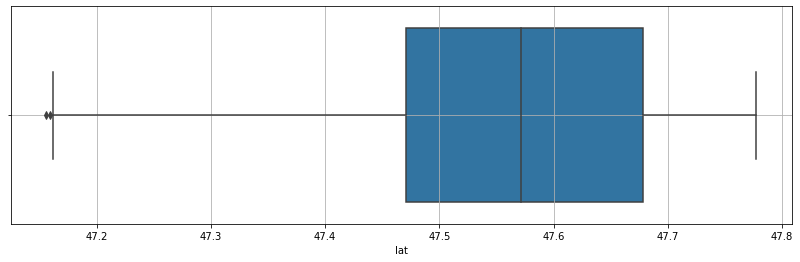

LONG


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


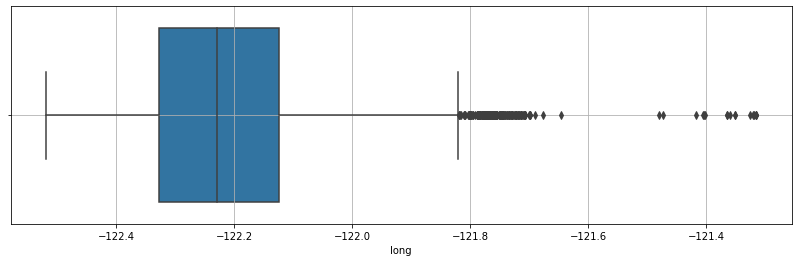

LIVING_MEASURE15


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


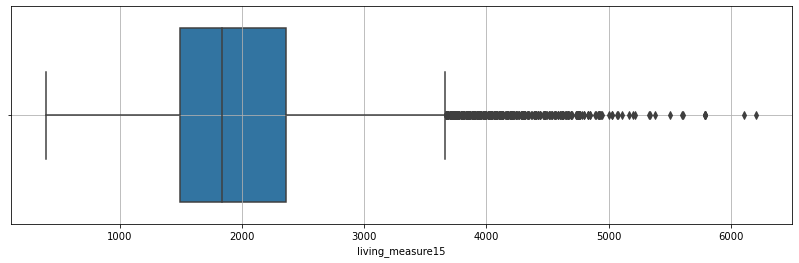

LOT_MEASURE15


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


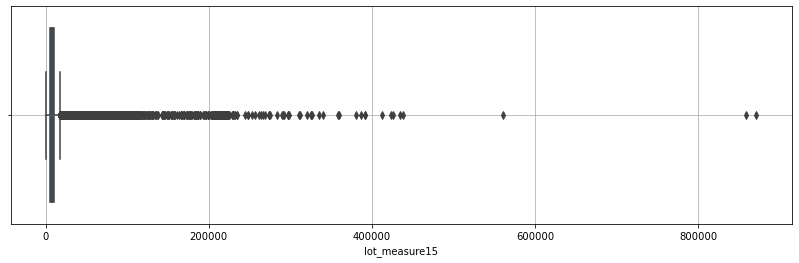

FURNISHED


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


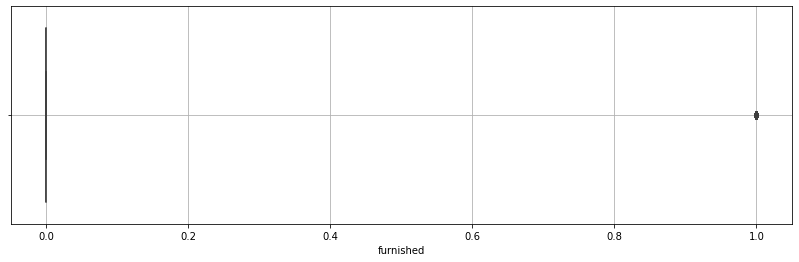

TOTAL_AREA


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


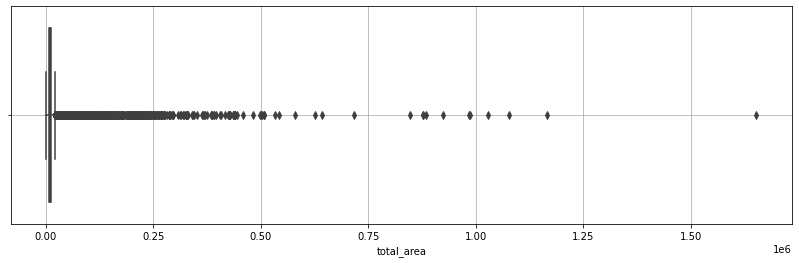

In [31]:
for column in hp.columns:
    if hp[column].dtype != 'object':
        print(column.upper())
        plt.figure(figsize=(14,4))
        sns.boxplot(hp[column])
        plt.grid()
        plt.show()

In [29]:
#we can drop few of the columns as these are just some extra info which we don't requirelike cid, lat and long columns.


In [29]:
hp1 = hp.drop(['cid','lat','long'],axis=1)

In [30]:
hp1.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000      4.00       1.75         3050.00      9440.00   
1  20150317T000000  190000      2.00       1.00          670.00      3101.00   
2  20140820T000000  735000      4.00       2.75         3040.00      2415.00   
3  20141010T000000  257000      3.00       2.50         1740.00      3721.00   
4  20150218T000000  450000      2.00       1.00         1120.00      4590.00   

   ceil  coast  sight  condition  quality  ceil_measure  basement  yr_built  \
0  1.00   0.00   0.00       3.00     8.00       1800.00   1250.00   1966.00   
1  1.00   0.00   0.00       4.00     6.00        670.00      0.00   1948.00   
2  2.00   1.00   4.00       3.00     8.00       3040.00      0.00   1966.00   
3  2.00   0.00   0.00       3.00     8.00       1740.00      0.00   2009.00   
4  1.00   0.00   0.00       3.00     7.00       1120.00      0.00   1924.00   

   yr_renovated  zipcode  living_measure15  lot_measure15  furnished  \
0             0    98034           2020.00        8660.00       0.00   
1             0    98118           1660.00        4100.00       0.00   
2             0    98118           2620.00        2433.00       0.00   
3             0    98002           2030.00        3794.00       0.00   
4             0    98118           1120.00        5100.00       0.00   

   total_area  
0    12490.00  
1     3771.00  
2     5455.00  
3     5461.00  
4     5710.00

<AxesSubplot:xlabel='lot_measure', ylabel='living_measure'>

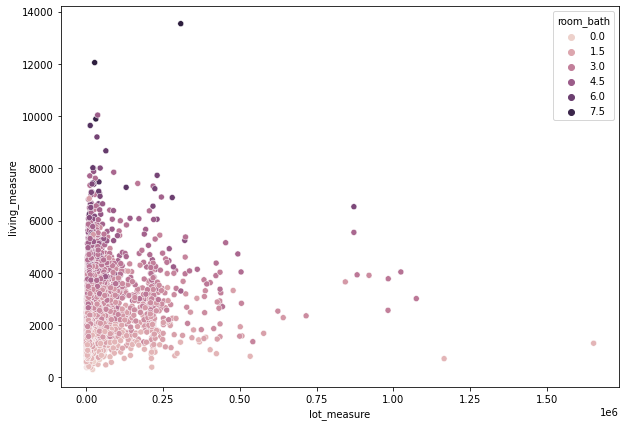

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='lot_measure', y='living_measure', hue='room_bath')

<AxesSubplot:xlabel='price', ylabel='living_measure'>

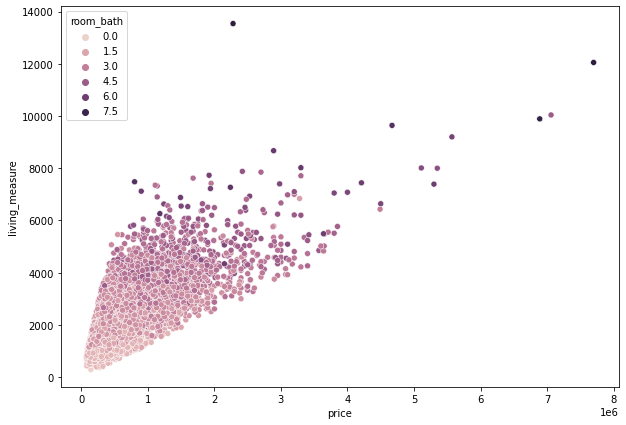

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='price', y='living_measure', hue='room_bath')

<AxesSubplot:xlabel='price', ylabel='living_measure'>

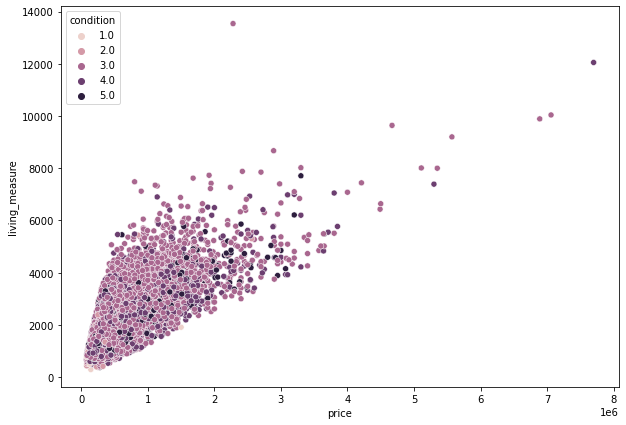

In [34]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='price', y='living_measure', hue='condition')

<AxesSubplot:xlabel='price', ylabel='lot_measure'>

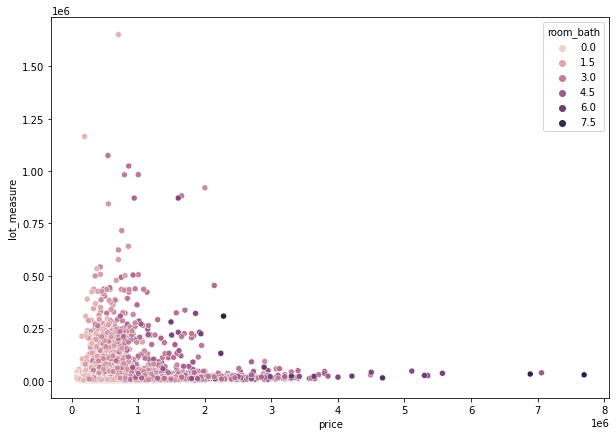

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='price', y='lot_measure',hue='room_bath')

<AxesSubplot:xlabel='price', ylabel='lot_measure'>

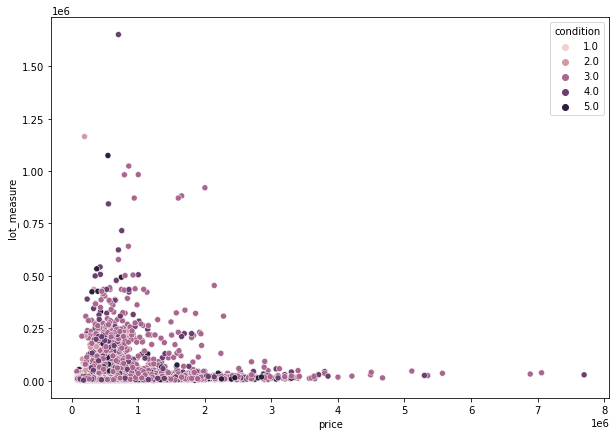

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='price', y='lot_measure',hue='condition')

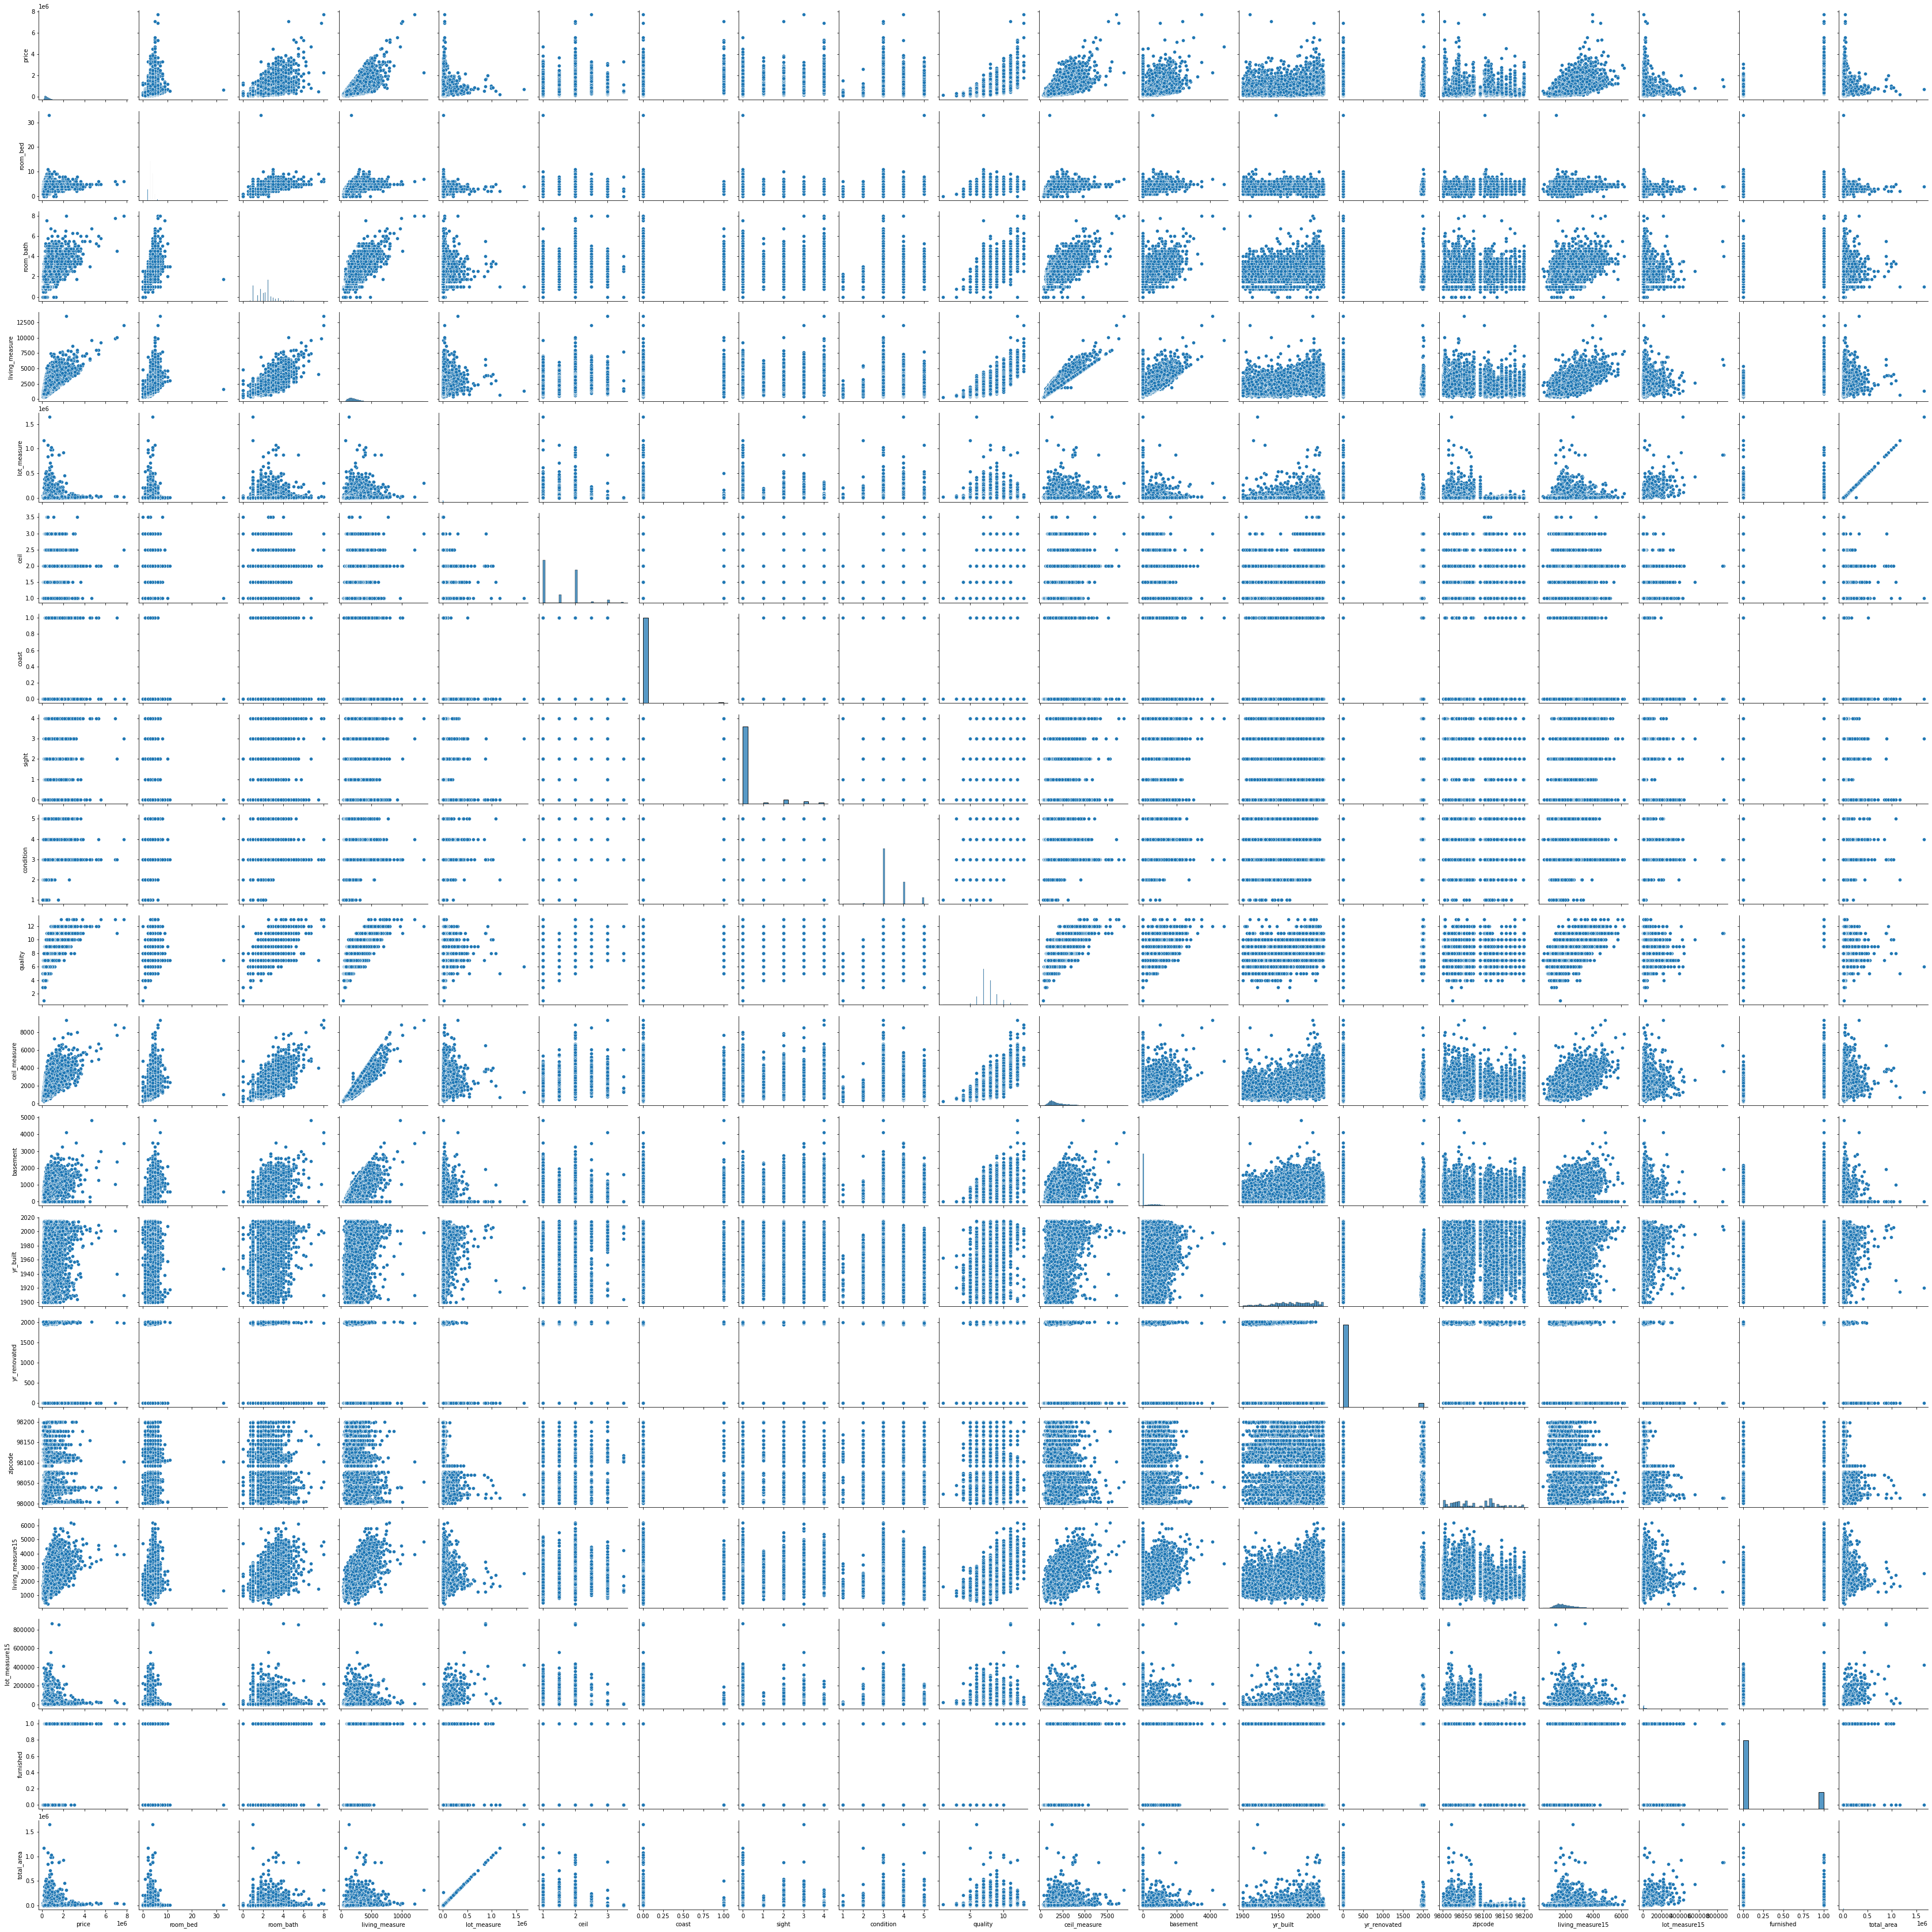

In [39]:
sns.pairplot(hp1)

<AxesSubplot:>

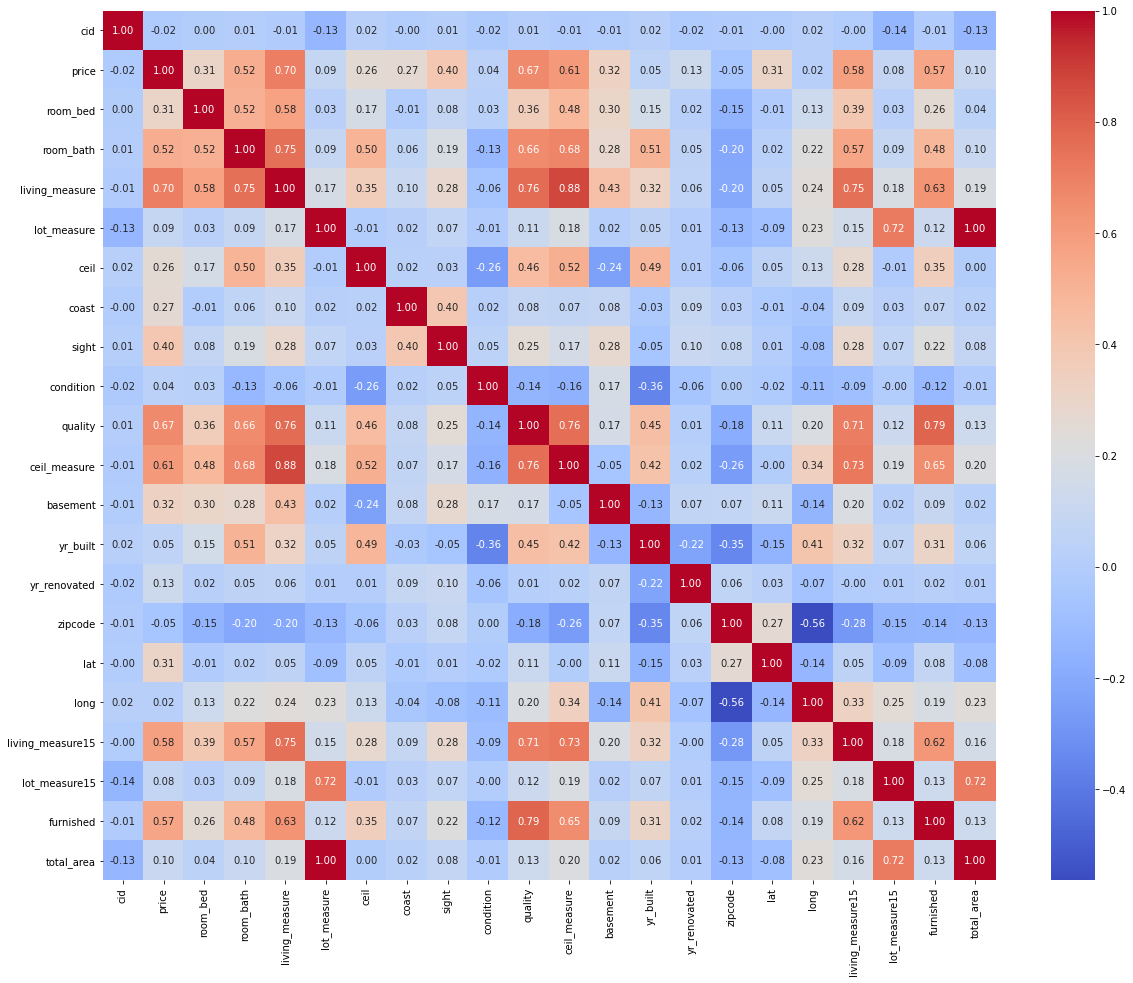

In [39]:
plt.figure(figsize=(20,16))
sns.heatmap(hp.corr(), annot=True, fmt='.2f', cmap='coolwarm')

<AxesSubplot:xlabel='total_area', ylabel='lot_measure'>

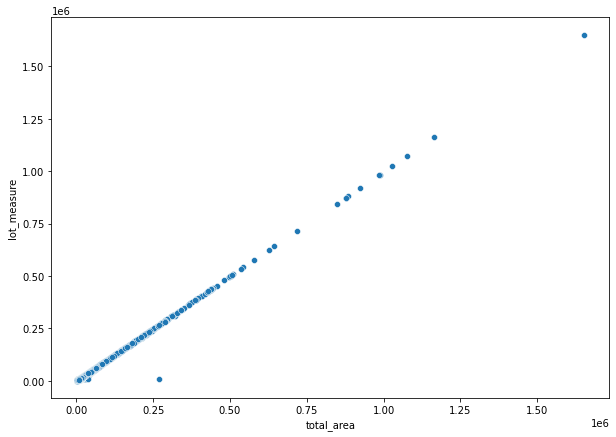

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='total_area', y='lot_measure')

<AxesSubplot:xlabel='price', ylabel='coast'>

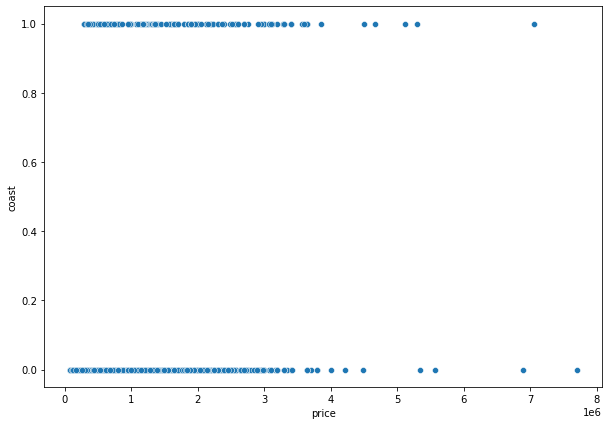

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='price', y='coast')

<AxesSubplot:xlabel='zipcode', ylabel='price'>

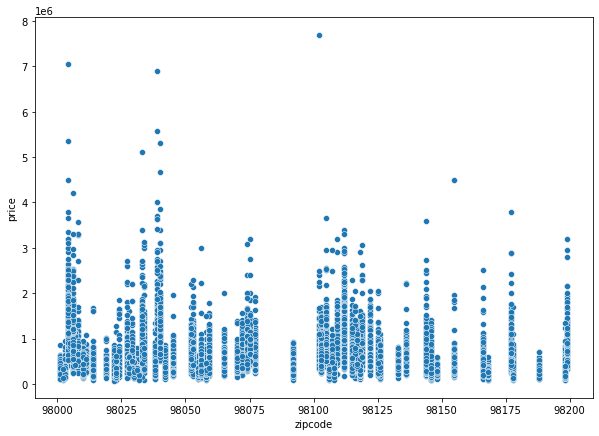

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='zipcode', y='price')

In [33]:
hp1['zipcode'].unique()

array([98034, 98118, 98002, 98030, 98103, 98006, 98042, 98031, 98065,
       98109, 98058, 98001, 98105, 98115, 98032, 98033, 98199, 98053,
       98056, 98102, 98038, 98092, 98003, 98075, 98059, 98008, 98011,
       98014, 98023, 98116, 98198, 98126, 98052, 98108, 98133, 98074,
       98077, 98106, 98045, 98146, 98155, 98117, 98027, 98040, 98072,
       98005, 98055, 98070, 98028, 98166, 98019, 98136, 98107, 98004,
       98125, 98112, 98024, 98177, 98122, 98168, 98029, 98007, 98178,
       98010, 98188, 98039, 98144, 98022, 98148, 98119], dtype=int64)

<AxesSubplot:xlabel='condition', ylabel='count'>

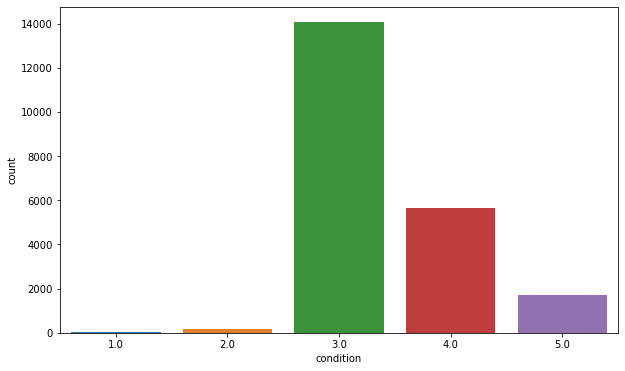

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=hp1, x='condition')

<AxesSubplot:xlabel='quality', ylabel='count'>

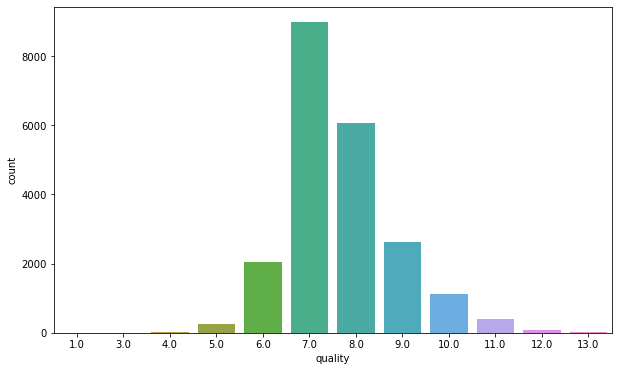

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=hp1, x='quality')

<AxesSubplot:xlabel='sight', ylabel='count'>

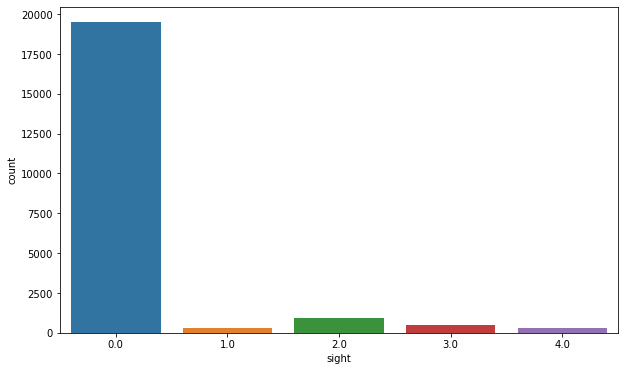

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=hp1, x='sight')

<AxesSubplot:xlabel='coast', ylabel='count'>

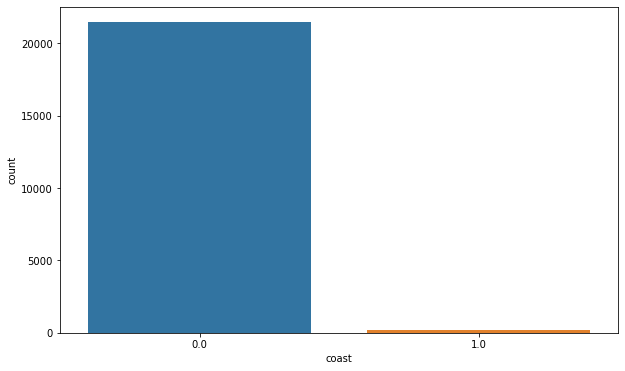

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=hp1, x='coast')

<AxesSubplot:xlabel='lot_measure15', ylabel='lot_measure'>

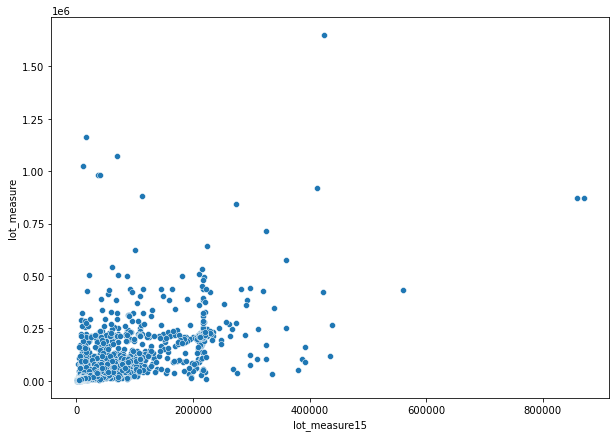

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='lot_measure15', y='lot_measure')

<AxesSubplot:xlabel='living_measure15', ylabel='living_measure'>

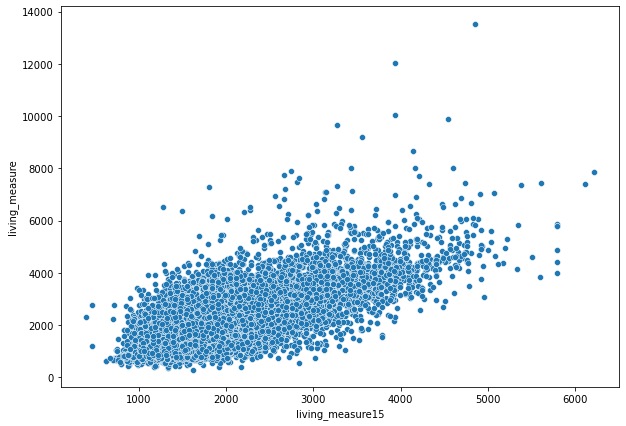

In [46]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='living_measure15', y='living_measure')

<AxesSubplot:xlabel='basement', ylabel='price'>

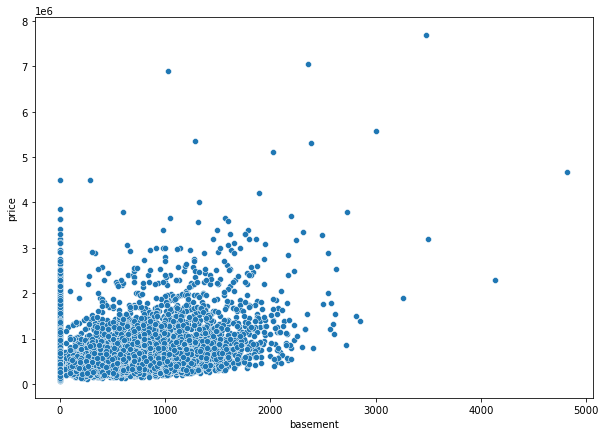

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='basement', y='price')

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

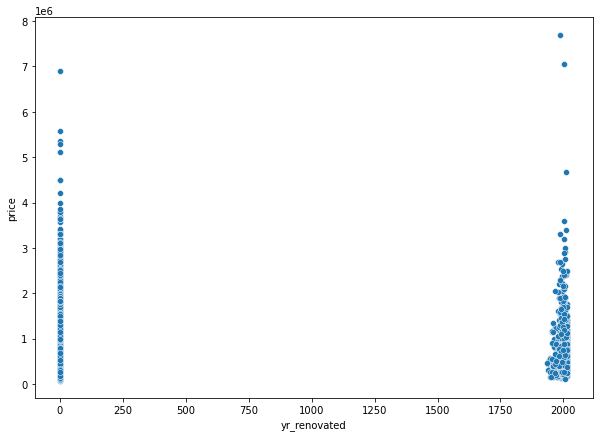

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=hp1, x='yr_renovated', y='price')

In [31]:
hp1.to_csv('EDA.csv', index=False)

In [32]:
yr_reno_gb = hp1.groupby(['yr_renovated', 'condition'])

In [33]:
yr_reno_gb.head()

dayhours    price  room_bed  room_bath  living_measure  \
0      20150427T000000   600000      4.00       1.75         3050.00   
1      20150317T000000   190000      2.00       1.00          670.00   
2      20140820T000000   735000      4.00       2.75         3040.00   
3      20141010T000000   257000      3.00       2.50         1740.00   
4      20150218T000000   450000      2.00       1.00         1120.00   
5      20140709T000000   245000      3.00       2.50         1610.00   
14     20150311T000000   189950      4.00       2.00         1910.00   
15     20140822T000000   733000      4.00       1.75         1930.00   
16     20140522T000000   600000      3.00       1.75         1650.00   
17     20140709T000000   215000      3.00       1.00         1200.00   
18     20140819T000000   968060      4.00       2.50         2620.00   
19     20150428T000000   807000      3.00       2.50         1940.00   
21     20140909T000000   199500      4.00       2.00         1750.00   
30     20140811T000000   140000      2.00       1.00          900.00   
58     20140709T000000   900000      4.00       2.50         2230.00   
59     20140508T000000   307000      3.00       1.75         1890.00   
72     20150507T000000   616500      3.00       2.00         2080.00   
84     20140815T000000   733000      3.00       1.75         1740.00   
93     20150325T000000   675500      4.00       2.75         2060.00   
129    20140905T000000   375000      4.00       2.25         1450.00   
154    20150428T000000   186375      3.00       1.00         1000.00   
165    20141203T000000   835000      3.00       1.75         1490.00   
271    20150420T000000   905000      4.00       2.25         2240.00   
296    20140624T000000  1160000      3.00       2.50         2740.00   
308    20140630T000000   550000      4.00       1.50         2750.00   
351    20150319T000000   770000      4.00       3.00         2320.00   
367    20140618T000000   465000      3.00       1.75         1510.00   
371    20140923T000000   808000      3.00       1.75         2590.00   
426    20140626T000000   660000      3.00       1.00         1210.00   
466    20150323T000000   230005      2.00       1.00         1030.00   
525    20141023T000000   521000      3.00       2.00         1840.00   
558    20140515T000000   451555      2.00       1.00         1320.00   
560    20150330T000000   555000      4.00       2.50         2160.00   
577    20141006T000000   377500      3.00       2.00         1370.00   
658    20141223T000000   540000      6.00       3.00         2870.00   
668    20141016T000000  1900000      4.00       2.75         4280.00   
712    20150305T000000   335000      3.00       2.00         1210.00   
737    20140706T000000  1280000      4.00       2.50         3160.00   
741    20150428T000000   355000      3.00       1.75         1870.00   
755    20140825T000000   295000      3.00       1.75         1500.00   
779    20140904T000000  1250000      6.00       3.25         3750.00   
793    20141007T000000  1090000      3.00       2.50         2920.00   
816    20141231T000000   441000      4.00       1.50         1100.00   
831    20140923T000000   734000      4.00       2.75         3090.00   
835    20141119T000000   705000      4.00       2.00         1820.00   
845    20141201T000000   555000      4.00       2.25         1720.00   
855    20141104T000000   354000      6.00       3.50         3020.00   
860    20140528T000000   550000      4.00       1.00         1660.00   
966    20140623T000000   899000      3.00       1.00         1480.00   
977    20150505T000000   500000      4.00       2.50         1770.00   
1044   20140619T000000   186000      3.00       2.00         1340.00   
1068   20141013T000000  7700000      6.00       8.00        12050.00   
1106   20150319T000000   350000      3.00       1.75         1980.00   
1131   20140505T000000   670000      3.00       2.50         1680.00   
1135   20140509T000000   742500      4.00       2.75  

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X= StandardScaler()

In [36]:
scaled_df =X.fit_transform(hp1.iloc[:,1:])
scaled_df

array([[ 0.16283444,  0.67919199, -0.47613567, ..., -0.15034228,
        -0.49445593, -0.11293772],
       [-0.95325602, -1.47526262, -1.45223789, ..., -0.31756702,
        -0.49445593, -0.32258894],
       [ 0.53032765,  0.67919199,  0.82533395, ..., -0.37869939,
        -0.49445593, -0.28209661],
       ...,
       [ 1.24625885, -0.39803532,  2.12680357, ...,  0.7940374 ,
         2.02242492,  0.50339215],
       [-0.75725965,  0.67919199,  0.49996654, ..., -0.18188028,
        -0.49445593, -0.1881996 ],
       [ 1.66002898,  0.67919199,  0.49996654, ..., -0.28914615,
         2.02242492, -0.24939496]])

In [55]:
from sklearn.cluster import KMeans

In [56]:
ws=[]

In [57]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    ws.append(KM.inertia_)

In [58]:
ws

[410647.0000000016,
 323257.0506986695,
 293098.7445791336,
 259132.00701762488,
 234940.964152952,
 215300.7005204532,
 197980.00266632682,
 188194.72928613637,
 177311.89081680222,
 169406.08591602265]

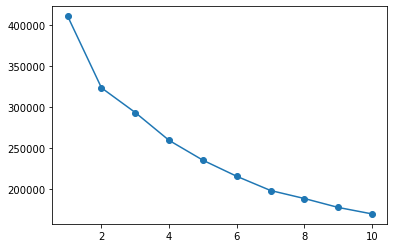

In [59]:
plt.plot(range(1,11), ws, marker='o')

In [60]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.labels_

array([0, 0, 1, ..., 1, 0, 1])

In [61]:
k_means.inertia_

323256.9917711295

In [62]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.labels_

array([0, 0, 2, ..., 2, 1, 2])

In [63]:
k_means3.inertia_

293098.466435496

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
silhouette_score(scaled_df, k_means3.labels_)

0.151384874514236

In [66]:
silhouette_samples(scaled_df, k_means3.labels_).min()

-0.26355750223249985

In [67]:
silhouette_score(scaled_df, k_means.labels_)

0.3241781076147282

In [68]:
silhouette_samples(scaled_df, k_means.labels_).min()

-0.19018703059470066

In [69]:
hp_clust = hp1

In [70]:
hp_clust['clust'] = k_means3.labels_

In [71]:
hp_clust.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000      4.00       1.75         3050.00      9440.00   
1  20150317T000000  190000      2.00       1.00          670.00      3101.00   
2  20140820T000000  735000      4.00       2.75         3040.00      2415.00   
3  20141010T000000  257000      3.00       2.50         1740.00      3721.00   
4  20150218T000000  450000      2.00       1.00         1120.00      4590.00   

   ceil  coast  sight  condition  quality  ceil_measure  basement  yr_built  \
0  1.00   0.00   0.00       3.00     8.00       1800.00   1250.00   1966.00   
1  1.00   0.00   0.00       4.00     6.00        670.00      0.00   1948.00   
2  2.00   1.00   4.00       3.00     8.00       3040.00      0.00   1966.00   
3  2.00   0.00   0.00       3.00     8.00       1740.00      0.00   2009.00   
4  1.00   0.00   0.00       3.00     7.00       1120.00      0.00   1924.00   

   yr_renovated  zipcode  living_measure15  lot_measure15  furnished  \
0             0    98034           2020.00        8660.00       0.00   
1             0    98118           1660.00        4100.00       0.00   
2             0    98118           2620.00        2433.00       0.00   
3             0    98002           2030.00        3794.00       0.00   
4             0    98118           1120.00        5100.00       0.00   

   total_area  clust  
0    12490.00      0  
1     3771.00      0  
2     5455.00      2  
3     5461.00      1  
4     5710.00      0

In [72]:

clust_profile=hp_clust.groupby('clust').mean()
clust_profile['freq']=hp_clust.clust.value_counts().sort_index()
clust_profile

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
clust                                                                     
0     422189.82      3.14       1.66         1634.08     11616.14  1.12   
1     452975.77      3.40       2.47         2044.38      8097.80  2.01   
2     988842.97      3.96       2.91         3367.81     34416.40  1.84   

       coast  sight  condition  quality  ceil_measure  basement  yr_built  \
clust                                                                       
0       0.00   0.16       3.60     6.98       1297.23    336.78   1952.75   
1       0.00   0.07       3.11     7.74       1939.42    105.16   1996.39   
2       0.03   0.68       3.28     9.43       2945.19    423.24   1986.70   

       yr_renovated  zipcode  living_measure15  lot_measure15  furnished  \
clust                                                                      
0             95.58 98089.69           1672.16       10585.21       0.00   
1             34.20 98066.79           1945.86        7739.65       0.07   
2            122.72 98060.67           2913.84       25746.02       0.91   

       total_area   freq  
clust                     
0        13253.57  11640  
1        10140.53   5787  
2        37865.50   4186

In [41]:
#Project Notes - II

In [42]:
#Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#with outliers and No scaling

In [39]:
X = hp1.drop(['price', 'dayhours'], axis=1)

y = hp1[['price']]

In [40]:
hp1.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000      4.00       1.75         3050.00      9440.00   
1  20150317T000000  190000      2.00       1.00          670.00      3101.00   
2  20140820T000000  735000      4.00       2.75         3040.00      2415.00   
3  20141010T000000  257000      3.00       2.50         1740.00      3721.00   
4  20150218T000000  450000      2.00       1.00         1120.00      4590.00   

   ceil  coast  sight  condition  quality  ceil_measure  basement  yr_built  \
0  1.00   0.00   0.00       3.00     8.00       1800.00   1250.00   1966.00   
1  1.00   0.00   0.00       4.00     6.00        670.00      0.00   1948.00   
2  2.00   1.00   4.00       3.00     8.00       3040.00      0.00   1966.00   
3  2.00   0.00   0.00       3.00     8.00       1740.00      0.00   2009.00   
4  1.00   0.00   0.00       3.00     7.00       1120.00      0.00   1924.00   

   yr_renovated  zipcode  living_measure15  lot_measure15  furnished  \
0             0    98034           2020.00        8660.00       0.00   
1             0    98118           1660.00        4100.00       0.00   
2             0    98118           2620.00        2433.00       0.00   
3             0    98002           2030.00        3794.00       0.00   
4             0    98118           1120.00        5100.00       0.00   

   total_area  
0    12490.00  
1     3771.00  
2     5455.00  
3     5461.00  
4     5710.00

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [42]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [43]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is -40239.123424921054
The coefficient for room_bath is 46201.56460781645
The coefficient for living_measure is 120.12873442719683
The coefficient for lot_measure is -0.6469934088454465
The coefficient for ceil is 29115.840037460897
The coefficient for coast is 555804.5346968528
The coefficient for sight is 43506.97406519079
The coefficient for condition is 20773.525215825914
The coefficient for quality is 108983.72381194816
The coefficient for ceil_measure is 37.73595763809135
The coefficient for basement is 50.283568751964594
The coefficient for yr_built is -3507.9896674282054
The coefficient for yr_renovated is 18.153731790411598
The coefficient for zipcode is -26.070797177427295
The coefficient for living_measure15 is 27.568123468621707
The coefficient for lot_measure15 is -0.5139480097677733
The coefficient for furnished is 35882.314803409085
The coefficient for total_area is 0.6206082006610814


In [44]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 8696654.72048824


In [45]:
regression_model.score(X_train, y_train)

0.6512711894995156

In [46]:
regression_model.score(X_test, y_test)

0.6637300352788581

In [47]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

room_bed  room_bath  living_measure  lot_measure  ceil  coast  sight  \
8918       3.00       2.00         1010.00      7380.00  1.00   0.00   0.00   
5891       4.00       1.00         1490.00      6000.00  1.50   0.00   0.00   
15604      3.00       2.50         2420.00      8856.00  1.00   0.00   3.00   
5469       3.00       2.50         2650.00      7286.00  2.00   0.00   0.00   
3745       3.00       2.00         1310.00      8440.00  1.00   0.00   0.00   

       condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
8918        3.00     7.00       1010.00      0.00   1982.00             0   
5891        3.00     7.00       1490.00      0.00   1918.00             0   
15604       3.00     9.00       1620.00    800.00   1957.00             0   
5469        3.00     8.00       2650.00      0.00   1990.00             0   
3745        5.00     6.00       1310.00      0.00   1951.00             0   

       zipcode  living_measure15  lot_measure15  furnished  total_area   price  
8918     98074           1650.00        9030.00       0.00     8390.00  385000  
5891     98136           1700.00        6000.00       0.00     7490.00  570000  
15604    98118           2650.00        9750.00       1.00    11276.00  755000  
5469     98059           2400.00        7220.00       0.00     9936.00  446500  
3745     98178           1790.00       10775.00       0.00     9750.00  223000

In [48]:
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

217223.34941759348

In [49]:
expr='price ~ room_bed + room_bath + living_measure + lot_measure+ ceil + coast + sight + condition + quality + ceil_measure + basement + yr_built + yr_renovated +zipcode + living_measure15 + lot_measure + furnished + total_area'

In [50]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept          7967532.84
room_bed            -39586.76
room_bath            46800.73
living_measure         118.76
lot_measure             -0.46
ceil                 30199.99
coast               554763.81
sight                43621.59
condition            20472.16
quality             109763.14
ceil_measure            37.97
basement                51.36
yr_built             -3527.00
yr_renovated            17.69
zipcode                -18.32
living_measure15        25.89
furnished            35526.39
total_area               0.20
dtype: float64

In [51]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1773.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:36:37   Log-Likelihood:            -2.2220e+05
No. Observations:               16209   AIC:                         4.444e+05
Df Residuals:                   16191   BIC:                         4.446e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.968e+06   3.64e+06  

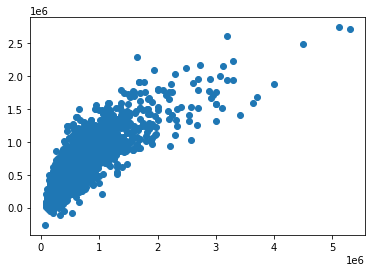

In [52]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [53]:
import math
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

212169.4233123242

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1

room_bed ---> 23.346757680533084
room_bath ---> 28.631690915520224
living_measure ---> 8299.886747467128
lot_measure ---> 604.2105930952123
ceil ---> 16.653274776708614
coast ---> 1.2096203880423828
sight ---> 1.5360345511763802
condition ---> 34.62202605703544
quality ---> 200.98396222210525
ceil_measure ---> 6240.273469926259
basement ---> 451.4315835507857
yr_built ---> 8804.850138192533
yr_renovated ---> 1.1901670778643199
zipcode ---> 8559.815365170343
living_measure15 ---> 26.534216759800007
lot_measure15 ---> 2.580620842131427
furnished ---> 3.4926028586245748
total_area ---> 632.6810247311814


In [55]:
#without Outliers and No scaling


In [56]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [57]:
hp1_N1 = hp1.copy()

In [58]:
hp1_N1 = hp1_N1.drop(['dayhours', 'coast','sight','yr_renovated','furnished'], axis=1)
hp1_N2 = hp1[['coast','sight','yr_renovated','furnished']]

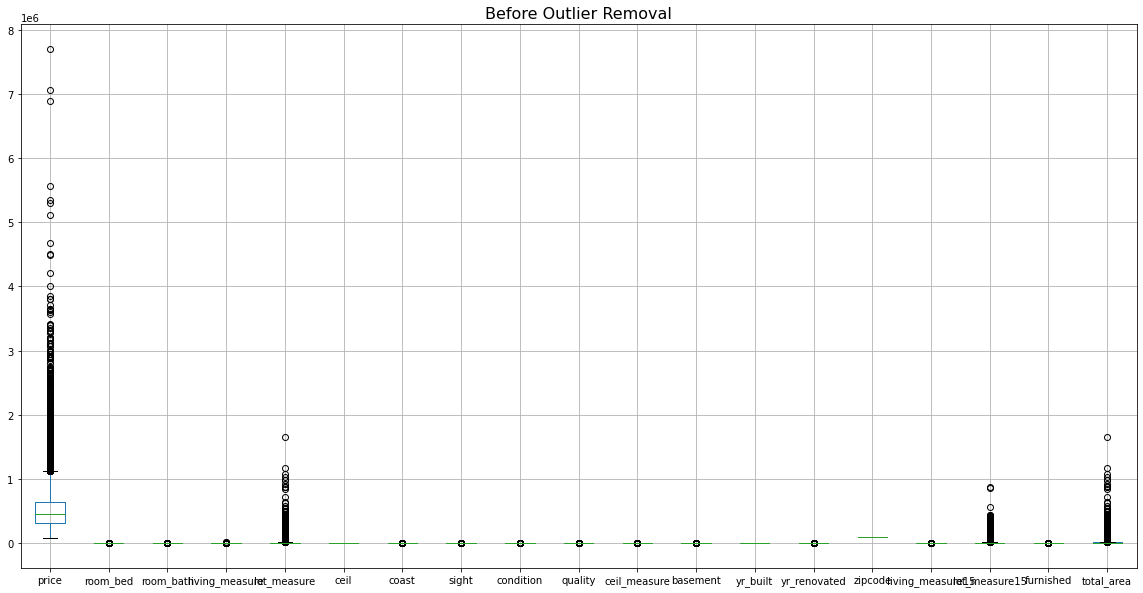

In [59]:
plt.figure(figsize=(20,10))
hp1.boxplot()
plt.title('Before Outlier Removal',fontsize=16)
plt.show()

In [60]:
hp1_N1.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
0  600000      4.00       1.75         3050.00      9440.00  1.00       3.00   
1  190000      2.00       1.00          670.00      3101.00  1.00       4.00   
2  735000      4.00       2.75         3040.00      2415.00  2.00       3.00   
3  257000      3.00       2.50         1740.00      3721.00  2.00       3.00   
4  450000      2.00       1.00         1120.00      4590.00  1.00       3.00   

   quality  ceil_measure  basement  yr_built  zipcode  living_measure15  \
0     8.00       1800.00   1250.00   1966.00    98034           2020.00   
1     6.00        670.00      0.00   1948.00    98118           1660.00   
2     8.00       3040.00      0.00   1966.00    98118           2620.00   
3     8.00       1740.00      0.00   2009.00    98002           2030.00   
4     7.00       1120.00      0.00   1924.00    98118           1120.00   

   lot_measure15  total_area  
0        8660.00    12490.00  
1        4100.00     3771.00  
2        2433.00     5455.00  
3        3794.00     5461.00  
4        5100.00     5710.00

In [61]:
hp1_N1.describe().T

count      mean       std      min       25%       50%  \
price            21613.00 540182.16 367362.23 75000.00 321950.00 450000.00   
room_bed         21613.00      3.37      0.93     0.00      3.00      3.00   
room_bath        21613.00      2.12      0.77     0.00      1.75      2.25   
living_measure   21613.00   2079.73    918.15   290.00   1430.00   1910.00   
lot_measure      21613.00  15090.03  41384.66   520.00   5043.00   7618.00   
ceil             21613.00      1.49      0.54     1.00      1.00      1.50   
condition        21613.00      3.41      0.65     1.00      3.00      3.00   
quality          21613.00      7.66      1.18     1.00      7.00      7.00   
ceil_measure     21613.00   1788.36    828.08   290.00   1190.00   1560.00   
basement         21613.00    291.51    442.58     0.00      0.00      0.00   
yr_built         21613.00   1971.01     29.36  1900.00   1951.00   1975.00   
zipcode          21613.00  98077.94     53.51 98001.00  98033.00  98065.00   
living_measure15 21613.00   1985.94    683.00   399.00   1490.00   1840.00   
lot_measure15    21613.00  12759.64  27269.32   651.00   5100.00   7620.00   
total_area       21613.00  17186.87  41589.08  1423.00   7035.00   9575.00   

                       75%        max  
price            645000.00 7700000.00  
room_bed              4.00      33.00  
room_bath             2.50       8.00  
living_measure     2550.00   13540.00  
lot_measure       10660.00 1651359.00  
ceil                  2.00       3.50  
condition             4.00       5.00  
quality               8.00      13.00  
ceil_measure       2210.00    9410.00  
basement            560.00    4820.00  
yr_built           1997.00    2015.00  
zipcode           98118.00   98199.00  
living_measure15   2360.00    6210.00  
lot_measure15     10080.00  871200.00  
total_area        13000.00 1652659.00

In [62]:
for column in hp1_N1.columns:
    lr,ur=remove_outlier(hp1_N1[column])
    hp1_N1[column]=np.where(hp1_N1[column]>ur,ur,hp1_N1[column])
    hp1_N1[column]=np.where(hp1_N1[column]<lr,lr,hp1_N1[column])

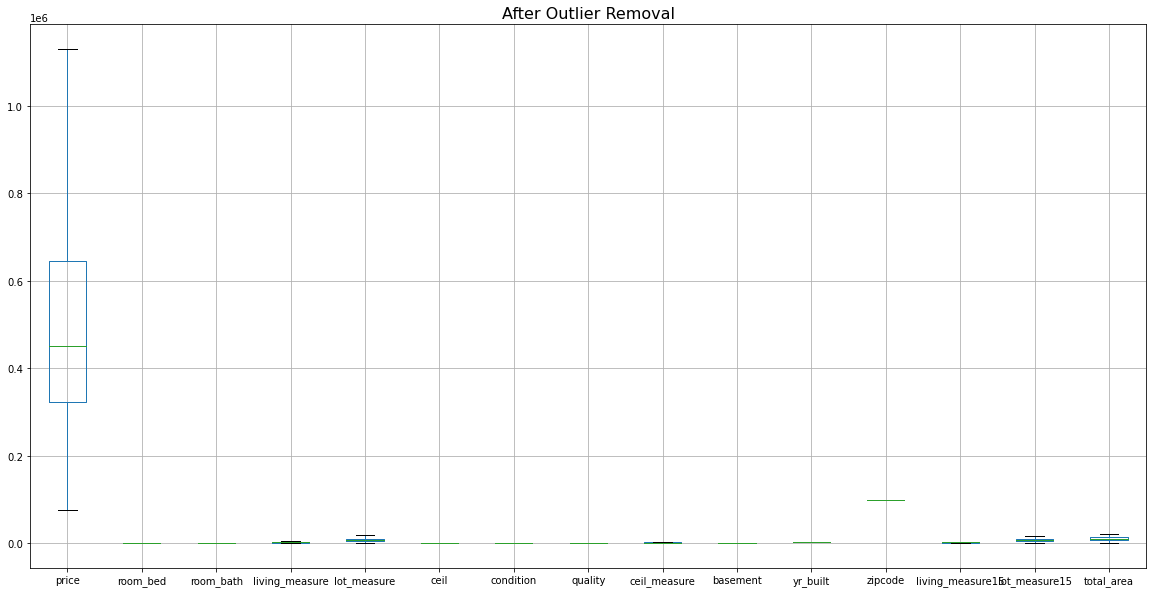

In [63]:
plt.figure(figsize=(20,10))
hp1_N1.boxplot()
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [64]:
hp1_N1.describe().T

count      mean       std      min       25%       50%  \
price            21613.00 511607.57 250047.95 75000.00 321950.00 450000.00   
room_bed         21613.00      3.36      0.85     1.50      3.00      3.00   
room_bath        21613.00      2.10      0.72     0.62      1.75      2.25   
living_measure   21613.00   2057.79    838.67   290.00   1430.00   1910.00   
lot_measure      21613.00   8693.50   5023.70   520.00   5043.00   7618.00   
ceil             21613.00      1.49      0.54     1.00      1.00      1.50   
condition        21613.00      3.41      0.65     1.50      3.00      3.00   
quality          21613.00      7.60      1.00     5.50      7.00      7.00   
ceil_measure     21613.00   1769.53    764.02   290.00   1190.00   1560.00   
basement         21613.00    284.05    417.06     0.00      0.00      0.00   
yr_built         21613.00   1971.01     29.36  1900.00   1951.00   1975.00   
zipcode          21613.00  98077.94     53.51 98001.00  98033.00  98065.00   
living_measure15 21613.00   1974.57    646.68   399.00   1490.00   1840.00   
lot_measure15    21613.00   8297.76   4359.63   651.00   5100.00   7620.00   
total_area       21613.00  10782.72   5418.81  1423.00   7035.00   9575.00   

                       75%        max  
price            645000.00 1129575.00  
room_bed              4.00       5.50  
room_bath             2.50       3.62  
living_measure     2550.00    4230.00  
lot_measure       10660.00   19085.50  
ceil                  2.00       3.50  
condition             4.00       5.00  
quality               8.00       9.50  
ceil_measure       2210.00    3740.00  
basement            560.00    1400.00  
yr_built           1997.00    2015.00  
zipcode           98118.00   98199.00  
living_measure15   2360.00    3665.00  
lot_measure15     10080.00   17550.00  
total_area        13000.00   21947.50

In [65]:
hp1_N11 = pd.concat([hp1_N1,hp1_N2],axis=1)
hp1_N11.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0 600000.00      4.00       1.75         3050.00      9440.00  1.00   
1 190000.00      2.00       1.00          670.00      3101.00  1.00   
2 735000.00      4.00       2.75         3040.00      2415.00  2.00   
3 257000.00      3.00       2.50         1740.00      3721.00  2.00   
4 450000.00      2.00       1.00         1120.00      4590.00  1.00   

   condition  quality  ceil_measure  basement  yr_built  zipcode  \
0       3.00     8.00       1800.00   1250.00   1966.00 98034.00   
1       4.00     6.00        670.00      0.00   1948.00 98118.00   
2       3.00     8.00       3040.00      0.00   1966.00 98118.00   
3       3.00     8.00       1740.00      0.00   2009.00 98002.00   
4       3.00     7.00       1120.00      0.00   1924.00 98118.00   

   living_measure15  lot_measure15  total_area  coast  sight  yr_renovated  \
0           2020.00        8660.00    12490.00   0.00   0.00             0   
1           1660.00        4100.00     3771.00   0.00   0.00             0   
2           2620.00        2433.00     5455.00   1.00   4.00             0   
3           2030.00        3794.00     5461.00   0.00   0.00             0   
4           1120.00        5100.00     5710.00   0.00   0.00             0   

   furnished  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.00

In [66]:
X1 = hp1_N11.drop('price', axis=1)

y1 = hp1_N11[['price']]

In [67]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25 , random_state=11)

In [68]:
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, y1_train)

LinearRegression()

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for room_bed is -21007.144698520293
The coefficient for room_bath is 28916.796185494724
The coefficient for living_measure is 159.4496657829195
The coefficient for lot_measure is -12.86554072531726
The coefficient for ceil is 26890.028926864783
The coefficient for coast is 19749.72905881931
The coefficient for sight is 89821.75700767474
The coefficient for condition is -75.08911050823463
The coefficient for quality is -54.16265974870271
The coefficient for ceil_measure is -2622.8610999529046
The coefficient for basement is 51.50774005742339
The coefficient for yr_built is 58.6482826292995
The coefficient for yr_renovated is -2.5550129655712226
The coefficient for zipcode is 10.35540331710581
The coefficient for living_measure15 is 120471.84496268071
The coefficient for lot_measure15 is 28559.509759434837
The coefficient for furnished is 8.307399421545881
The coefficient for total_area is 62075.2511726731


In [70]:
intercept1 = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is -445553.5209496627


In [71]:
regression_model1.score(X1_train, y1_train)

0.6726279473739929

In [72]:
regression_model1.score(X1_test, y1_test)

0.6818678091579173

In [73]:
from sklearn import metrics
predicted_train1=regression_model.fit(X1_train, y1_train).predict(X1_train)
np.sqrt(metrics.mean_squared_error(y1_train,predicted_train1))

142411.92883100134

In [74]:
predicted_test1=regression_model1.fit(X1_train, y1_train).predict(X1_test)
np.sqrt(metrics.mean_squared_error(y1_test,predicted_test1))

142931.4340952755

In [75]:
data_train1 = pd.concat([X1_train, y1_train], axis=1)
data_test1 = pd.concat([X1_test,y1_test],axis=1)
data_train1.head()

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
15610      3.00       2.50         1820.00      4200.00  2.00       3.00   
19098      5.00       3.62         4230.00     14600.00  2.00       3.00   
8426       4.00       3.25         3960.00      7012.00  2.00       3.00   
16863      2.00       2.00         1510.00      6516.00  1.00       3.00   
8607       5.00       3.00         2240.00     18265.00  2.00       4.00   

       quality  ceil_measure  basement  yr_built  zipcode  living_measure15  \
15610     8.00       1820.00      0.00   2014.00 98038.00           2370.00   
19098     9.50       3740.00      0.00   2013.00 98039.00           3665.00   
8426      9.50       3740.00      0.00   2005.00 98075.00           3665.00   
16863     8.00       1510.00      0.00   2005.00 98053.00           1640.00   
8607      8.00       2240.00      0.00   1963.00 98027.00           1990.00   

       lot_measure15  total_area  coast  sight  yr_renovated  furnished  \
15610        4200.00     6020.00   0.00   0.00             0       0.00   
19098       17550.00    19790.00   0.00   1.00             0       1.00   
8426         8522.00    10972.00   0.00   0.00             0       1.00   
16863        6009.00     8026.00   0.00   0.00             0       0.00   
8607        17550.00    20505.00   0.00   0.00             0       0.00   

           price  
15610  307635.00  
19098 1129575.00  
8426   860000.00  
16863  479950.00  
8607   805000.00

In [76]:
expr1='price ~ room_bed + room_bath + living_measure + lot_measure+ ceil + coast + sight + condition + quality + ceil_measure + basement + yr_built + yr_renovated +zipcode + living_measure15 + lot_measure + furnished + total_area'

In [77]:
import statsmodels.formula.api as smf
lm11 = smf.ols(formula= expr1, data = data_train1).fit()
lm11.params

Intercept          -879388.24
room_bed            -21110.28
room_bath            29402.93
living_measure         159.71
lot_measure            -14.58
ceil                 28246.52
coast               117781.04
sight                28474.39
condition            19262.95
quality              89947.36
ceil_measure           -75.24
basement               -53.66
yr_built             -2642.03
yr_renovated             7.77
zipcode                 56.28
living_measure15        57.27
furnished            61447.23
total_area              10.19
dtype: float64

In [78]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1954.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:37:00   Log-Likelihood:            -2.1535e+05
No. Observations:               16209   AIC:                         4.307e+05
Df Residuals:                   16191   BIC:                         4.309e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -8.794e+05   2.41e+06  

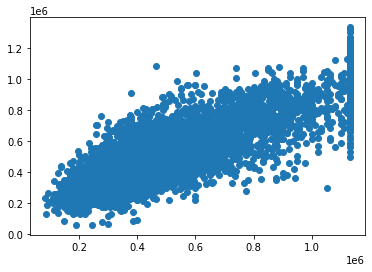

In [79]:
y_pred1 = regression_model1.predict(X1_test)
plt.scatter(y1_test['price'], y_pred1)

In [80]:
vif1 = [variance_inflation_factor(X1.values, ix) for ix in range(X1.shape[1])] 
i=0
for column in X1.columns:
    if i < 20:
        print (column ,"--->",  vif1[i])
        i = i+1

room_bed ---> 29.308100465401058
room_bath ---> 32.07386266743121
living_measure ---> 538.4051860334478
lot_measure ---> 668.5101110267876
ceil ---> 20.12197265305027
condition ---> 35.365993034140956
quality ---> 260.968817294062
ceil_measure ---> 424.43730831168034
basement ---> 27.98049132104406
yr_built ---> 9298.055447014916
zipcode ---> 8910.2816920759
living_measure15 ---> 30.958587230746268
lot_measure15 ---> 28.160594338080053
total_area ---> 908.7980564649322
coast ---> 1.2178432087708009
sight ---> 1.5224297341031845
yr_renovated ---> 1.2011875624538715
furnished ---> 3.6336514789307914


In [81]:
#without Outliers and Scaled Data

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(hp1_N1)
hp1_S = scaler.transform(hp1_N1)
hp1_S=pd.DataFrame(hp1_S, columns=hp1_N1.columns)
hp1_S.describe()

price  room_bed  room_bath  living_measure  lot_measure     ceil  \
count 21613.00  21613.00   21613.00        21613.00     21613.00 21613.00   
mean      0.41      0.47       0.49            0.45         0.44     0.20   
std       0.24      0.21       0.24            0.21         0.27     0.22   
min       0.00      0.00       0.00            0.00         0.00     0.00   
25%       0.23      0.38       0.37            0.29         0.24     0.00   
50%       0.36      0.38       0.54            0.41         0.38     0.20   
75%       0.54      0.62       0.62            0.57         0.55     0.40   
max       1.00      1.00       1.00            1.00         1.00     1.00   

       condition  quality  ceil_measure  basement  yr_built  zipcode  \
count   21613.00 21613.00      21613.00  21613.00  21613.00 21613.00   
mean        0.55     0.52          0.43      0.20      0.62     0.39   
std         0.19     0.25          0.22      0.30      0.26     0.27   
min         0.00     0.00          0.00      0.00      0.00     0.00   
25%         0.43     0.38          0.26      0.00      0.44     0.16   
50%         0.43     0.38          0.37      0.00      0.65     0.32   
75%         0.71     0.62          0.56      0.40      0.84     0.59   
max         1.00     1.00          1.00      1.00      1.00     1.00   

       living_measure15  lot_measure15  total_area  
count          21613.00       21613.00    21613.00  
mean               0.48           0.45        0.46  
std                0.20           0.26        0.26  
min                0.00           0.00        0.00  
25%                0.33           0.26        0.27  
50%                0.44           0.41        0.40  
75%                0.60           0.56        0.56  
max                1.00           1.00        1.00

In [83]:
hp2 = pd.concat([hp1_S, hp1_N2], axis=1)
hp2.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
0   0.50      0.62       0.37            0.70         0.48  0.00       0.43   
1   0.11      0.12       0.12            0.10         0.14  0.00       0.71   
2   0.63      0.62       0.71            0.70         0.10  0.40       0.43   
3   0.17      0.38       0.62            0.37         0.17  0.40       0.43   
4   0.36      0.12       0.12            0.21         0.22  0.00       0.43   

   quality  ceil_measure  basement  yr_built  zipcode  living_measure15  \
0     0.62          0.44      0.89      0.57     0.17              0.50   
1     0.12          0.11      0.00      0.42     0.59              0.39   
2     0.62          0.80      0.00      0.57     0.59              0.68   
3     0.62          0.42      0.00      0.95     0.01              0.50   
4     0.38          0.24      0.00      0.21     0.59              0.22   

   lot_measure15  total_area  coast  sight  yr_renovated  furnished  
0           0.47        0.54   0.00   0.00             0       0.00  
1           0.20        0.11   0.00   0.00             0       0.00  
2           0.11        0.20   1.00   4.00             0       0.00  
3           0.19        0.20   0.00   0.00             0       0.00  
4           0.26        0.21   0.00   0.00             0       0.00

In [84]:
X2 = hp2.drop('price', axis=1)
y2= hp2[['price']]

In [85]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X2, y2, test_size=0.25 , random_state=123)

In [86]:
reg_model2 = LinearRegression()
reg_model2.fit(X_train_scale, y_train_scale)

LinearRegression()

In [87]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model2.coef_[0][idx]))

The coefficient for room_bed is -0.07215007919493273
The coefficient for room_bath is 0.0790094593810135
The coefficient for living_measure is 0.550097194951909
The coefficient for lot_measure is -0.17770308077150546
The coefficient for ceil is 0.06122401735926128
The coefficient for condition is 0.06720182253276712
The coefficient for quality is 0.3444829043756046
The coefficient for ceil_measure is -0.19947103601248314
The coefficient for basement is -0.05591241494934907
The coefficient for yr_built is -0.2910958614625165
The coefficient for zipcode is 0.008590031855578648
The coefficient for living_measure15 is 0.1853581471071631
The coefficient for lot_measure15 is -0.044674751584204656
The coefficient for total_area is 0.15254906808033064
The coefficient for coast is 0.1213958169121129
The coefficient for sight is 0.026951019423162574
The coefficient for yr_renovated is 1.0783977075032314e-05
The coefficient for furnished is 0.05660944340908801


In [88]:
intercept2 = reg_model2.intercept_[0]

print("The intercept for our model is {}".format(intercept2))

The intercept for our model is 0.12620874250725994


In [89]:
reg_model2.score(X_train_scale, y_train_scale)

0.6797788572492591

In [90]:
reg_model2.score(X_test_scale, y_test_scale)

0.6596949627294024

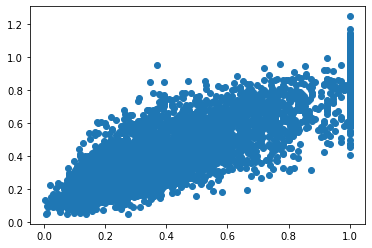

In [91]:
y_pred2 = reg_model2.predict(X_test_scale)
plt.scatter(y_test_scale['price'], y_pred2)

In [92]:
data_train_scale = pd.concat([X_train_scale, y_train_scale], axis=1)
data_test_scale=pd.concat([X_test_scale,y_test_scale],axis=1)
data_train_scale.head()

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
5207       0.38       0.12            0.19         0.43  0.00       1.00   
18391      0.38       0.62            0.39         0.14  0.00       0.43   
21278      0.12       0.12            0.10         0.24  0.00       1.00   
6410       0.38       0.37            0.29         0.42  0.00       0.71   
844        0.38       0.37            0.48         0.59  0.00       0.71   

       quality  ceil_measure  basement  yr_built  zipcode  living_measure15  \
5207      0.12          0.21      0.00      0.76     0.11              0.31   
18391     0.38          0.23      0.53      0.88     0.09              0.41   
21278     0.12          0.12      0.00      0.45     0.28              0.20   
6410      0.38          0.33      0.00      0.53     0.04              0.36   
844       0.38          0.55      0.00      0.45     0.67              0.40   

       lot_measure15  total_area  coast  sight  yr_renovated  furnished  price  
5207            0.46        0.39   0.00   0.00             0       0.00   0.14  
18391           0.18        0.17   0.00   0.00             0       0.00   0.27  
21278           0.27        0.21   0.00   0.00             0       0.00   0.11  
6410            0.42        0.41   0.00   0.00             0       0.00   0.35  
844             0.44        0.60   0.00   0.00             0       0.00   0.27

In [93]:
expr_scale='price ~ room_bed + room_bath + living_measure + lot_measure+ ceil + coast + sight + condition + quality + ceil_measure + basement + yr_built + yr_renovated +zipcode + living_measure15 + lot_measure + furnished+ total_area'

In [94]:
lm1_scale = smf.ols(formula= expr_scale, data = data_train_scale).fit()
lm1_scale.params

Intercept           0.12
room_bed           -0.07
room_bath           0.08
living_measure      0.55
lot_measure        -0.21
ceil                0.06
coast               0.12
sight               0.03
condition           0.07
quality             0.35
ceil_measure       -0.20
basement           -0.05
yr_built           -0.29
yr_renovated        0.00
zipcode             0.01
living_measure15    0.18
furnished           0.06
total_area          0.14
dtype: float64

In [95]:
print(lm1_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2018.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:37:13   Log-Likelihood:                 9436.2
No. Observations:               16209   AIC:                        -1.884e+04
Df Residuals:                   16191   BIC:                        -1.870e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1245      0.007  

In [96]:
mse_scale = np.mean((reg_model2.predict(X_test_scale)-y_test_scale)**2)
math.sqrt(mse_scale)

0.13530159520309235

In [97]:
mse_scale_t = np.mean((reg_model2.predict(X_train_scale)-y_train_scale)**2)
math.sqrt(mse_scale_t)

0.13510731037673682

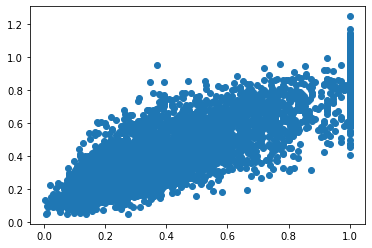

In [98]:
y_pred_scale= reg_model2.predict(X_test_scale)
plt.scatter(y_test_scale['price'], y_pred_scale)

In [99]:
vif2 = [variance_inflation_factor(X2.values, ix) for ix in range(X2.shape[1])] 
i=0
for column in X2.columns:
    if i < 20:
        print (column ,"--->",  vif2[i])
        i = i+1

room_bed ---> 9.942171992622603
room_bath ---> 17.424104781361258
living_measure ---> 417.51244048204967
lot_measure ---> 587.0614002062988
ceil ---> 4.313358478483947
condition ---> 7.36242231229606
quality ---> 23.62781544202274
ceil_measure ---> 315.9858298961444
basement ---> 27.906645288572463
yr_built ---> 11.362686453173865
zipcode ---> 2.876148505515971
living_measure15 ---> 19.884885878616025
lot_measure15 ---> 24.810018482377853
total_area ---> 704.2669917953108
coast ---> 1.2176818401804788
sight ---> 1.5305856092045012
yr_renovated ---> 1.1480034650521824
furnished ---> 3.4020429470901266


In [100]:
#KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [102]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X2, y2, test_size=0.25 , random_state=123)

In [103]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scale, y_train_scale)  #fit the model
    y_pred_KNN=model.predict(X_test_scale) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_scale,y_pred_KNN)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.1629107978773826
RMSE value for k=  2 is: 0.14289847451299992
RMSE value for k=  3 is: 0.13641870881035795
RMSE value for k=  4 is: 0.13296123615240765
RMSE value for k=  5 is: 0.13198691974358712
RMSE value for k=  6 is: 0.13147735858778584
RMSE value for k=  7 is: 0.1309898076137315
RMSE value for k=  8 is: 0.1309905008551671
RMSE value for k=  9 is: 0.13093392184726363
RMSE value for k=  10 is: 0.13062907574979957
RMSE value for k=  11 is: 0.13068605951309215
RMSE value for k=  12 is: 0.13055250949468777
RMSE value for k=  13 is: 0.13086642823891548
RMSE value for k=  14 is: 0.13105413852188386
RMSE value for k=  15 is: 0.13122311048825316
RMSE value for k=  16 is: 0.13140016867273654
RMSE value for k=  17 is: 0.13149674510875492
RMSE value for k=  18 is: 0.13166542096894387
RMSE value for k=  19 is: 0.13200592809651526
RMSE value for k=  20 is: 0.1320200933940957


<AxesSubplot:>

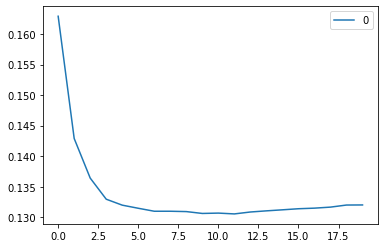

In [104]:
curve = pd.DataFrame(rmse_val) #lookinf for elbow curve
curve.plot()

In [105]:
#there is confusion between value of 3 and 4.To decide which number is best suite we can use the gridsearch method.

In [106]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scale,y_train_scale)
model.best_params_

{'n_neighbors': 10}

In [107]:
NNH = neighbors.KNeighborsRegressor(n_neighbors= 10 , weights = 'distance' )

In [108]:
NNH.fit(X_train_scale, y_train_scale)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [109]:
predicted_labels1 = NNH.predict(X_train_scale)
NNH.score(X_train_scale, y_train_scale)

0.9988200633683569

In [110]:
predicted_labels = NNH.predict(X_test_scale)
NNH.score(X_test_scale, y_test_scale)

0.6903585664850378

In [111]:
mse_scale_tN10 = np.mean((NNH.predict(X_train_scale)-y_train_scale)**2)
math.sqrt(mse_scale_tN10)

0.008201309263233451

In [112]:
mse_scale_N10 = np.mean((NNH.predict(X_test_scale)-y_test_scale)**2)
math.sqrt(mse_scale_N10)

0.1290619619555307

In [113]:
NNH_4 = neighbors.KNeighborsRegressor(n_neighbors= 4 , weights = 'distance' )

In [114]:
NNH_4.fit(X_train_scale, y_train_scale)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [115]:
predicted_labels_t4 = NNH_4.predict(X_train_scale)
NNH_4.score(X_train_scale, y_train_scale)

0.9988200633683569

In [116]:
predicted_labels_4 = NNH_4.predict(X_test_scale)
NNH_4.score(X_test_scale, y_test_scale)

0.6754916369035233

In [117]:
mse_scale_tN4 = np.mean((NNH_4.predict(X_train_scale)-y_train_scale)**2)
math.sqrt(mse_scale_tN4)

0.00820130926323337

In [118]:
mse_scale_N4 = np.mean((NNH_4.predict(X_test_scale)-y_test_scale)**2)
math.sqrt(mse_scale_N4)

0.13212398834254555

In [119]:
NNH_3 = neighbors.KNeighborsRegressor(n_neighbors= 3 , weights = 'distance' )
NNH_3.fit(X_train_scale, y_train_scale)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [120]:
predicted_labels_t3 = NNH_3.predict(X_train_scale)
NNH_3.score(X_train_scale, y_train_scale)

0.9988200633683569

In [121]:
predicted_labels_3 = NNH_3.predict(X_test_scale)
NNH_3.score(X_test_scale, y_test_scale)

0.6576503540256392

In [122]:
mse_scale_tN3 = np.mean((NNH_3.predict(X_train_scale)-y_train_scale)**2)
math.sqrt(mse_scale_tN3)

0.008201309263233349

In [123]:
mse_scale_N3 = np.mean((NNH_3.predict(X_test_scale)-y_test_scale)**2)
math.sqrt(mse_scale_N3)

0.13570744364733314

In [124]:
#Random Forest and MLP (ANN)

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [127]:
grid_search.fit(X_train_scale, y_train_scale)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 8], 'max_features': [11, 12, 13],
                         'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [128]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 301}

In [129]:
best_grid = grid_search.best_estimator_

In [130]:
ytrain_predict = best_grid.predict(X_train_scale)
ytest_predict = best_grid.predict(X_test_scale)

In [131]:
best_grid.score(X_train_scale, y_train_scale)

0.7656376046471121

In [132]:
best_grid.score(X_test_scale, y_test_scale)

0.7217387255163121

In [133]:
from sklearn.metrics import mean_squared_error

In [134]:
mse_rf = mean_squared_error(ytest_predict, y_test_scale)
math.sqrt(mse_rf)

0.12234750380590755

In [135]:
mse_rf_t= mean_squared_error(ytrain_predict, y_train_scale)
math.sqrt(mse_rf_t)

0.11558402422926935

In [117]:
#MLR(ANN)

In [140]:
param_grid1 = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [1000]
}

mlp = MLPRegressor()

grid_search1 = GridSearchCV(estimator = mlp, param_grid = param_grid1, cv = 3)

In [141]:
grid_search1.fit(X_train_scale, y_train_scale)

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [1000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [142]:
grid_search1.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.001}

In [143]:
best_grid1 = grid_search1.best_estimator_

In [144]:
best_grid1.score(X_train_scale, y_train_scale)

0.6307888103425877

In [145]:
best_grid1.score(X_test_scale, y_test_scale)

0.6089417979383971

In [146]:
ytrain_predict1 = best_grid1.predict(X_train_scale)
ytest_predict1 = best_grid1.predict(X_test_scale)

In [147]:
mse_ann = mean_squared_error(ytest_predict1, y_test_scale)
math.sqrt(mse_ann)

0.14504054658472176

In [148]:
mse_ann_t= mean_squared_error(ytrain_predict1, y_train_scale)
math.sqrt(mse_ann_t)

0.14507456407722816

In [136]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor(base_estimator=rfcl, n_estimators=50, random_state=1)
bg =bg.fit(X_train_scale, y_train_scale)

In [137]:
bg.score(X_train_scale, y_train_scale)

0.9356181982697679

In [138]:
bg.score(X_test_scale, y_test_scale)

0.8114165990718851

In [124]:
ytrain_predict_bg = bg.predict(X_train_scale)
ytest_predict_bg = bg.predict(X_test_scale)

In [126]:
mse_bag = mean_squared_error(ytest_predict_bg, y_test_scale)
math.sqrt(mse_bag)

0.10072109994002325

In [127]:
mse_bag_t = mean_squared_error(ytrain_predict_bg, y_train_scale)
math.sqrt(mse_bag_t)

0.06058085662716548

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 70, random_state=1)
gd = gb.fit(X_train_scale, y_train_scale)

In [140]:
gd.score(X_train_scale, y_train_scale)

0.7994407531803407

In [141]:
gd.score(X_test_scale, y_test_scale)

0.7719437434547209

In [142]:
ytrain_predict_gd = gd.predict(X_train_scale)
ytest_predict_gd = gd.predict(X_test_scale)

In [143]:
mse_gd = mean_squared_error(ytrain_predict_gd, y_train_scale)
math.sqrt(mse_gd)

0.10692399869152074

In [144]:
mse_gd = mean_squared_error(ytest_predict_gd, y_test_scale)
math.sqrt(mse_gd)

0.1107617282993297

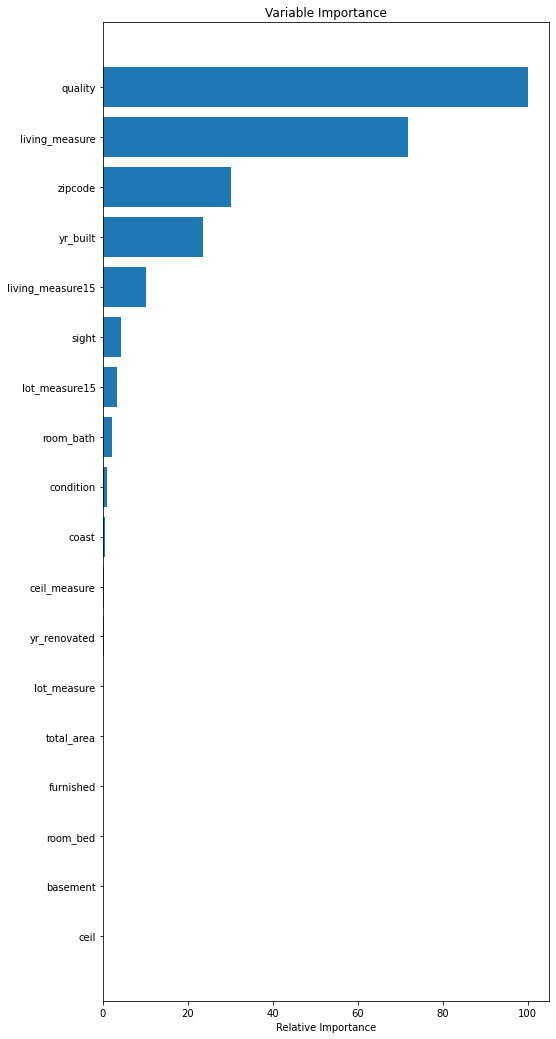

In [146]:
feature_importance = gd.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scale.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()